<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/ML_Final_Clickbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alternus Vera : Clickbait

- Course code : CMPE-257
- Name : Sivaranjani Kumar
- SJSU ID:013839813

###Datasets
Considering the recent manifestation of Fake News detection and the factors that affect the notion of knowing which news is fake and which is real, not many resources are available to predict a news to be fake or real. Few of the possible datasets which were considered for this project are explained below.

- Liar Liar Pants on Fire Dataset 
- Fake News Dataset
- News Category Dataset




###Process Steps:

 - Load the Data
 - Distillation Process
        - Data Preparation
        - Data Observation
        - Data Cleaning and Text Preprocessing
        - Data Visualization
        - Feature Extraction
        - Dataset Amalgamation
        - TF-IDF Vectorization
        - doc2bow
        - LDA Topic Modelling
        - cosine similarity
        - Sentiment Analysis
        - NER
        - Classification
        - Extract Feature Vector
        - Apply Neural Network
 - Classification Models on Amalgamated data
        - Random Forest Classifier
        - XGBoost classifier
        - Decision Tree Classifier
 - Ranking and Importance
 - Form Polynomial Equation
 - Transformer - BERT Model











##Clickbait

When the link of a news article is made appealing along with a flashy headline, it provokes the users to click.  Clickbaits are highly attention seeking in any websites. They can be pointed out by the use of certain sentences, images, keywords and symbols. Clickbait (headlines) make use of misleading titles that hide critical information from or exaggerate the content on the landing target pages to entice clicks. As clickbait’s often use eye-catching wording to attract viewers, target contents are often of low quality. Clickbait’s are especially widespread on social media such as Twitter, adversely impacting user experience by causing immense dissatisfaction. Hence, it has become increasingly important to put forward a widely applicable approach to identify and detect clickbait’s 

###References: Clickbait

https://medium.com/zerone-magazine/you-wont-believe-how-these-9-shocking-clickbaits-work-number-8-is-a-killer-4cb2ceded8b6

https://almeta.io/en/blog/how-to-detect-clickbait-headlines-using-nlp/

https://www.kaggle.com/c/fake-news/data

https://people.mpi-sws.org/~achakrab/papers/chakraborty_clickbait_asonam16.pdf

https://towardsdatascience.com/working-with-hugging-face-transformers-and-tf-2-0-89bf35e3555a

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

[1] Biyani, Prakhar, Kostas Tsioutsiouliklis, and John Blackmer. “” 8 Amazing Secrets for Getting More Clicks”: Detecting Clickbaits in News Streams Using Article Informality.” Thirtieth AAAI Conference on Artificial Intelligence. 2016.

[2] Potthast, Martin, et al. “The clickbait challenge 2017: towards a regression model for clickbait strength.” arXiv preprint arXiv:1812.10847 (2018).

[3] Venneti, Lasya, and Aniket Alam. “How Curiosity can be modeled for a Clickbait Detector.” arXiv preprint arXiv:1806.04212 (2018)

##Mounting google drive and Loading the Dataset..

In [310]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
liarFilepath = base_dir + '/Alternus_vera/liar_dataset/Liardataset.csv'
df = pd.read_csv(liarFilepath, encoding= 'unicode_escape') 

In [313]:
df.head(2)

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [314]:
df['class'].value_counts()

half-true      2627
FALSE          2507
mostly-true    2454
barely-true    2103
TRUE           2053
pants-fire     1047
Name: class, dtype: int64

###Distillation: Data Cleaning and Text Preprocessing
Steps included in the preprocessing:

- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming
- Spell Check

Removing stop words, there are some words in english language which does not contribute meaninig to the phrase, words such as before, had, when are called as stop words and they are filtered using nltk library stop words corpus. Numbers and whitespace characters are removed. The leading and trailing whitespaces are of no use. Lemmatization is a process of grouping together the different inflected forms of a word so they can be analysed as a single item. This is similar to stemming but it brings context to the words. So it links words with similar meaning to one word. These steps are standard in all NLP tasks and it is followed and applied on the news text. 

In [315]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.stem import WordNetLemmatizer 
def lemmatization(x):
  lemmatizer = WordNetLemmatizer() 
  text = lemmatizer.lemmatize(x)
  return text

In [0]:
import re
def removenumbers(x):
  text = re.sub(r'\d+', '', x)
  return text

In [0]:
#Removing Special Characters
def removespecialchars(x):
  x = str(x)
  x = x.lower()
  regex = re.compile('[^ a-zA-Z]')
  return regex.sub('',x)

In [0]:
#Removing white spaces
def removewhitespace(x):
  text = x.rstrip()
  text = text.lstrip()
  return text

In [320]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
#Removing stop words
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS   
stop_words = STOP_WORDS
def removestopwords(x):
  tokens = word_tokenize(x)
  result = [i for i in tokens if not i in stop_words]
  return result

In [0]:
 #Applying stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize       
stemmer= PorterStemmer()
def stemming(wordList):
  res = []
  for word in wordList:
    res.append(stemmer.stem(word))
  return res

In [0]:
def preprocess_text(x):
  text = removenumbers(x)
  text = removespecialchars(text)
  text = removewhitespace(text)
  wordList = removestopwords(text)
  text = ' '.join(wordList)
  res = lemmatization(text)
  return res

In [0]:
df = df.sample(frac=1)

###Creating a clean statement column after preprocessing in liar liar dataset

In [0]:
df['clean_statement'] = df['statement'].apply(preprocess_text)

In [326]:
df.head(3)

,json,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
5382,755.json,half-true,There are so many loopholes ... our businesses...,taxes,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a debate in Oxford, Miss.",loopholes businesses pay effectively lowest ta...
9425,265.json,pants-fire,I don't describe your plan as amnesty in my ad...,immigration,mitt-romney,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0,19.0,"a debate in Manchester, N.H.",dont describe plan amnesty ad dont amnesty
2198,1976.json,barely-true,We have that program where immigrants come her...,immigration,jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a U.S. Senate Democratic primary debate,program immigrants come bring million dollars ...


###Visualizing liar liar dataset

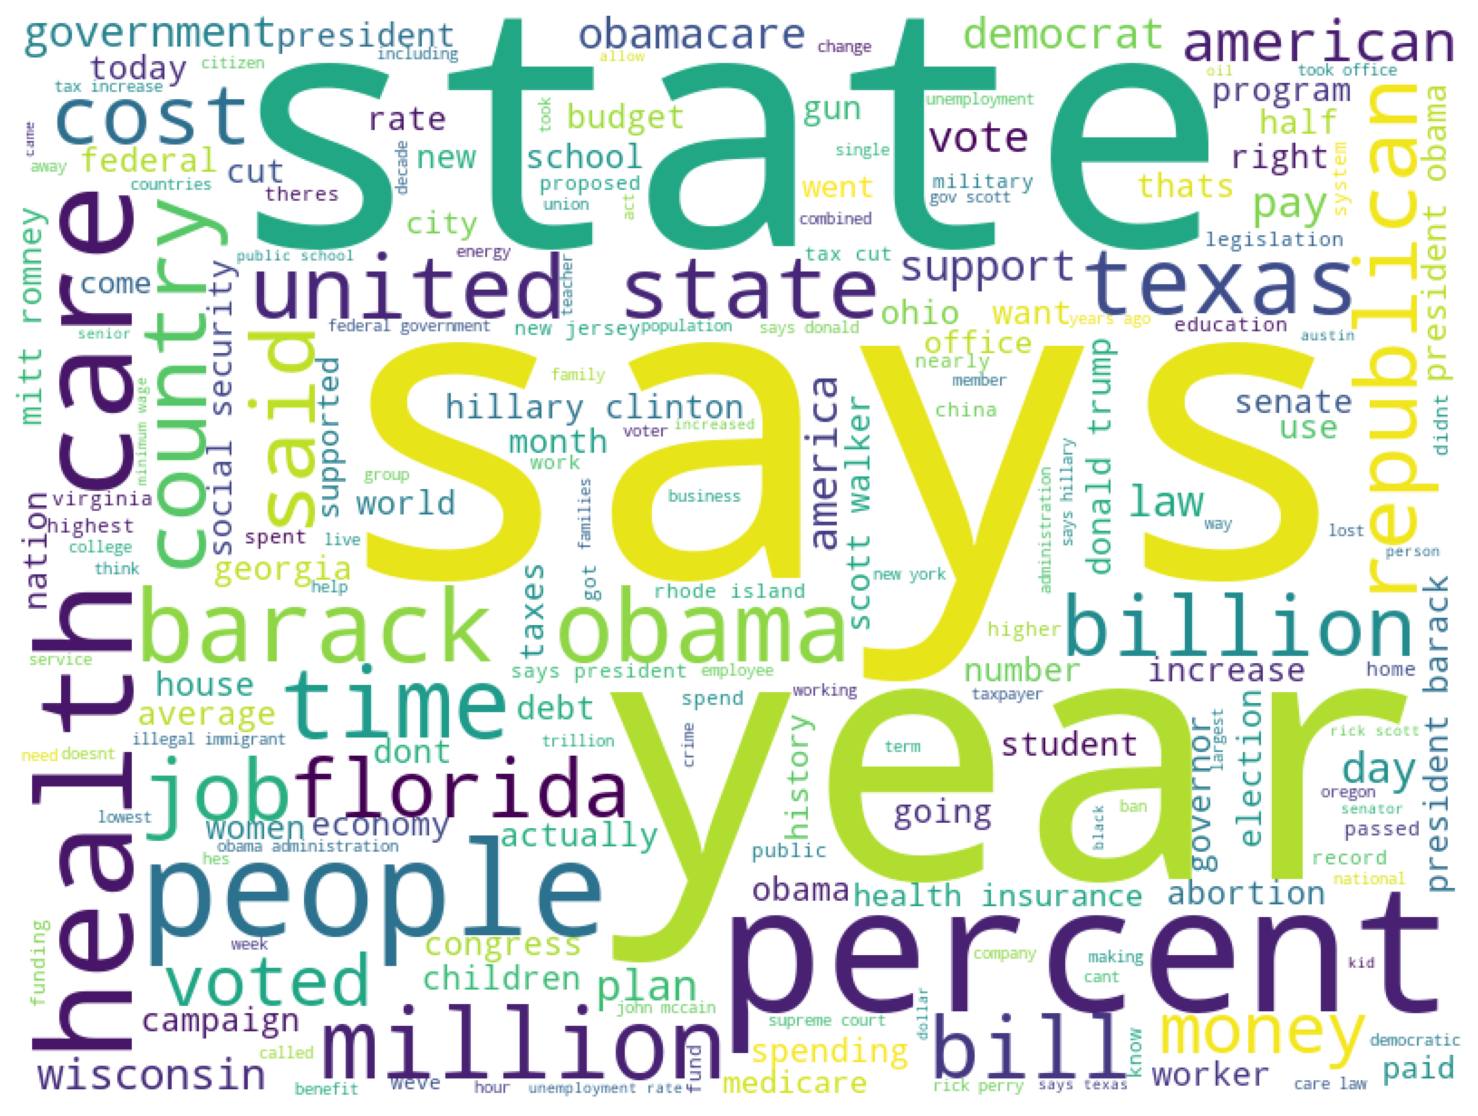

In [327]:
from wordcloud import WordCloud, STOPWORDS
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df['clean_statement']))

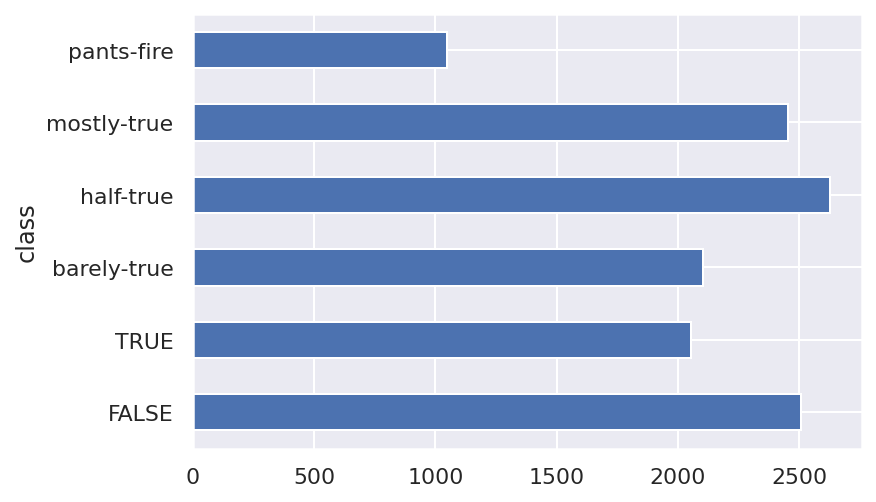

In [328]:
df.groupby(['class']).size().plot(kind='barh')

In [0]:
df = df[['class', 'statement', 'subject', 'speaker', 'speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'clean_statement']]

In [330]:
df['class'].unique()

array(['half-true', 'pants-fire', 'barely-true', 'FALSE', 'TRUE',
       'mostly-true'], dtype=object)

In [331]:
df['class'].astype(str, errors='ignore')

5382       half-true
9425      pants-fire
2198     barely-true
7751     barely-true
4959     barely-true
            ...     
12217    mostly-true
9837       half-true
12211      half-true
1209            TRUE
4304     barely-true
Name: class, Length: 12791, dtype: object

In [332]:
df.dtypes

class                    object
statement                object
subject                  object
speaker                  object
speaker_job_title        object
state_info               object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
clean_statement          object
dtype: object

###Dividing dataset into all true and all false based on the class label in order to amalgamate with other two dataset..

In [0]:
#All True
full_true = df.loc[df['class'] == 'TRUE']
most_true = df.loc[df['class'] == 'mostly-true']
half_true = df.loc[df['class'] == 'half-true']

#All False
barely_true = df.loc[df['class'] == 'barely-true']
full_false = df.loc[df['class'] == 'FALSE']
pants_fire = df.loc[df['class'] == 'pants-fire']

In [334]:
half_true.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
5382,half-true,There are so many loopholes ... our businesses...,taxes,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a debate in Oxford, Miss.",loopholes businesses pay effectively lowest ta...
8826,half-true,Says David Wu has presided over 137 months in ...,"economy,job-accomplishments",rob-cornilles,consultant,Oregon,republican,1.0,1.0,3.0,1.0,1.0,The Oregonian's Voter Guide,says david wu presided months oregons unemploy...


In [335]:
full_false.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
7820,FALSE,On gay marriage,"gays-and-lesbians,marriage,voting-record",mark-herring,State senator,Virginia,democrat,1.0,0.0,0.0,1.0,0.0,a debate,gay marriage
1206,FALSE,Passage of a referendum on an aquarium for Cle...,"city-budget,water",friends-clearwater-pac,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,a flier,passage referendum aquarium clearwater means f...


In [336]:
pants_fire.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
9425,pants-fire,I don't describe your plan as amnesty in my ad...,immigration,mitt-romney,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0,19.0,"a debate in Manchester, N.H.",dont describe plan amnesty ad dont amnesty
4079,pants-fire,Everyone on Californias roads is properly lice...,"public-safety,transportation",luis-alejo,Assemblyman,California,democrat,0.0,0.0,0.0,0.0,1.0,a press release,californias roads properly licensed tested ins...


In [337]:
barely_true.head(2)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
2198,barely-true,We have that program where immigrants come her...,immigration,jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a U.S. Senate Democratic primary debate,program immigrants come bring million dollars ...
7751,barely-true,Only three in 10 Texas doctors are currently a...,"federal-budget,health-care,medicaid,public-hea...",rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,a press release jointly issued with U.S. Sens....,texas doctors currently accepting new medicaid...


In [0]:
ls = full_true.columns

In [339]:
ls

Index(['class', 'statement', 'subject', 'speaker', 'speaker_job_title',
       'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
       'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
       'context', 'clean_statement'],
      dtype='object')

In [0]:
all_true = pd.concat([full_true, most_true, half_true])
all_false = pd.concat([barely_true,full_false,pants_fire])

In [341]:
all_true['class'].unique()

array(['TRUE', 'mostly-true', 'half-true'], dtype=object)

In [342]:
all_false['class'].unique()

array(['barely-true', 'FALSE', 'pants-fire'], dtype=object)

In [0]:
all_true = all_true[['class', 'clean_statement', 'context', 'subject', 'speaker', 'speaker_job_title','state_info','party_affiliation','half_true_counts','mostly_true_counts']]
all_false = all_false[['class', 'clean_statement', 'context', 'subject', 'speaker', 'speaker_job_title','state_info','party_affiliation','barely_true_counts','false_counts','pants_on_fire_counts']]

In [0]:
features = ['clean_statement']

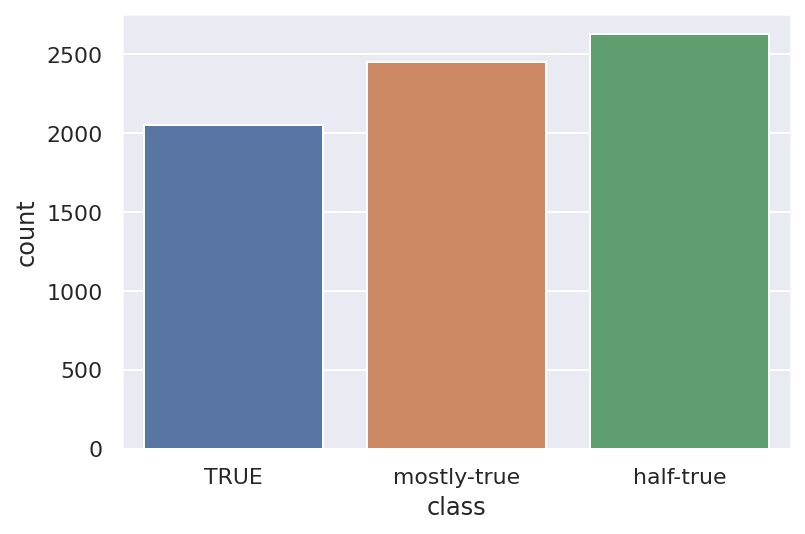

In [345]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=all_true)

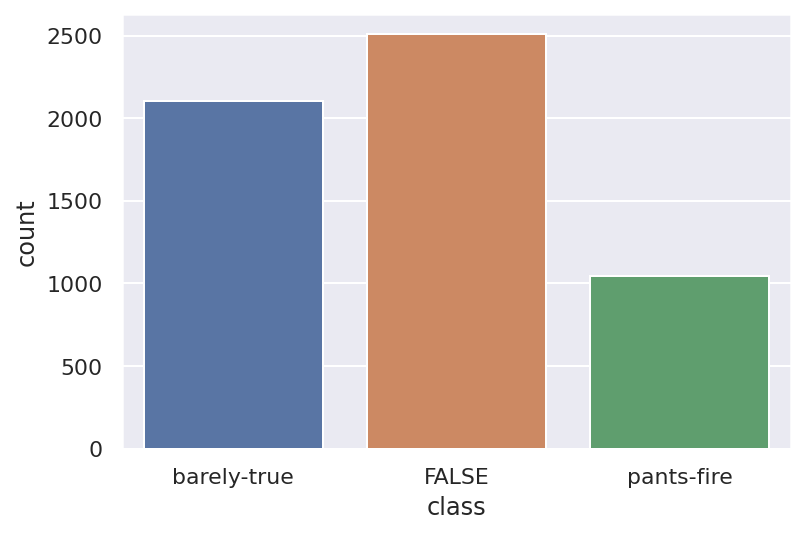

In [346]:
ax = sns.countplot(x="class", data=all_false)

#All_True

Encoding label for all true and all false dataset..

In [347]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_true['class'])

LabelEncoder()

In [0]:
label = le.transform(all_true['class'])

In [349]:
le.transform(all_true['class'])

array([0, 0, 0, ..., 1, 1, 1])

In [350]:
np.unique(label, return_index=True)

(array([0, 1, 2]), array([   0, 4507, 2053]))

In [0]:
y = label

In [352]:
le.inverse_transform(y)

array(['TRUE', 'TRUE', 'TRUE', ..., 'half-true', 'half-true', 'half-true'],
      dtype=object)

In [353]:
y

array([0, 0, 0, ..., 1, 1, 1])

###Applying TF-IDF Vectorization and using RandomForest Classifier for liar liar dataset

Term Frequency-Inverse Document Frequency is another vectorization technique used to vectorize text using word frequency. TF-IDF assigns lower weights for common words. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. TF-IDF Vectorizer converts a collection of raw documents to a matrix of TF-IDF features. This is applied in most of the individual factor analysis. The vectorized words are used to train the model to classify the news to correct category. The train data is from liar-liar dataset. Using this model, the labels are re-assigned to the appropriate classes in other two dataset. 

In [0]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
rfmodel = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [0]:
temp = all_true[features]

In [357]:
temp.head(3)

,clean_statement
7193,general assembly explicit constitutional autho...
1753,mandatory ultrasounds abortions
9293,sherrod brown failed pay taxes separate times


In [358]:
temp.shape


(7134, 1)

In [0]:
X_title_text = all_true.clean_statement.values

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)

In [0]:
X_title_tfidf = tfidf.fit_transform (X_title_text)

In [0]:
#X_title_tfidf_train, X_title_tfidf_test, y_title_train, y_title_test = train_test_split(X_title_tfidf,y, test_size = 0.2, random_state=1234)

In [363]:
rfmodel.fit(X_title_tfidf, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#y_true_pred = rfmodel.predict(X_title_tfidf_test)

In [0]:
#print ("Random Forest F1 and Accuracy Scores for the 'Title' of the dataset : \n")
#print ( "F1 score {:.4}%".format( f1_score(y_title_test, y_true_pred, average='macro')*100 ) )
#print ( "Accuracy  {:.4}%".format(accuracy_score(y_title_test, y_true_pred)*100))

###Loading Kaggle News category dataset 

In [0]:
newscategoryFilepath = base_dir + '/Alternus_vera/News_Category.csv'

In [0]:
df_newscat = pd.read_csv(newscategoryFilepath)

In [0]:
df_newscat = df_newscat.loc[df_newscat['category'] == 'POLITICS']

In [369]:
df_newscat.head(4)

,category,headline,authors,link,short_description,date
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18


In [0]:
df_newscat=df_newscat.dropna()

###Preprocessing, feature engineering, TF-IDF Vectorization for news category dataset....

In [0]:
df_newscat['clean_text'] = df_newscat.apply(lambda row: preprocess_text(str(row['short_description'])), axis=1)

In [372]:
X_title_tfidf.shape

(7134, 150)

In [0]:
X_clean_text = df_newscat.clean_text.values

In [0]:
X_text_tfidf = tfidf.fit_transform(X_clean_text)

In [375]:
X_text_tfidf.shape

(26913, 84)

In [0]:
A=X_text_tfidf.toarray()

In [0]:
A = np.pad(A, ((0,0),(0,66)), mode='constant')

In [378]:
A.shape

(26913, 150)

In [0]:
y_pred = rfmodel.predict(A)

In [380]:
np.unique(le.inverse_transform(y_pred))

array(['TRUE', 'half-true', 'mostly-true'], dtype=object)

In [0]:
df_newscat['textlabel'] = le.inverse_transform(y_pred)

In [382]:
df_newscat.head(5)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18,peeping minute,half-true
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Laura Bassett,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...,5/26/18,irish women longer travel united kingdom end p...,half-true


In [383]:
df_newscat['textlabel'].value_counts()

half-true      26675
mostly-true      236
TRUE               2
Name: textlabel, dtype: int64

#All_False

Applying TF-IDF Vectorization for the false labels in liar liar datatset and label encoding..

In [384]:
from sklearn import preprocessing
le_false = preprocessing.LabelEncoder()
le_false.fit(all_false['class'])

LabelEncoder()

In [0]:
label_false = le_false.transform(all_false['class'])

In [386]:
le_false.transform(all_false['class'])

array([1, 1, 1, ..., 2, 2, 2])

In [387]:
np.unique(label_false, return_index=True)

(array([0, 1, 2]), array([2103,    0, 4610]))

In [0]:
y_false = label_false

In [389]:
le_false.inverse_transform(y_false)

array(['barely-true', 'barely-true', 'barely-true', ..., 'pants-fire',
       'pants-fire', 'pants-fire'], dtype=object)

In [390]:
y_false

array([1, 1, 1, ..., 2, 2, 2])

###Random Forest Classifier

In [0]:
rfmodel_false = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

In [0]:
False_text = all_false.clean_statement.values

In [0]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df= 0.85, min_df= 0.01)
False_features_tfidf = tfidf.fit_transform (False_text)

In [0]:
#X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(False_features_tfidf,y_false, test_size = 0.2, random_state=1234)

In [395]:
rfmodel_false.fit(False_features_tfidf, y_false)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#y_false_pred = rfmodel_false.predict(X_tfidf_test)

In [0]:
#print ("Random Forest F1 and Accuracy Scores for the 'Title' of the dataset : \n")
#print ( "F1 score {:.4}%".format( f1_score(y_test, y_false_pred, average='macro')*100 ) )
#print ( "Accuracy  {:.4}%".format(accuracy_score(y_test, y_false_pred)*100))

##Importing Fake news Dataset

In [0]:
fake_news = base_dir + '/Alternus_vera/fake.csv'
df_fake = pd.read_csv(fake_news) 

In [399]:
df_fake.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


In [400]:
df_fake.language.unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

In [0]:
df_fake = df_fake[df_fake['language'] == 'english']

In [0]:
# df_fake.head(2)

In [0]:
df1_fake = df_fake[['author', 'title', 'text', 'site_url', 'domain_rank']]

In [404]:
df1_fake.head(2)

,author,title,text,site_url,domain_rank
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0


In [405]:
df1_fake.dtypes

author          object
title           object
text            object
site_url        object
domain_rank    float64
dtype: object

###Preprocessing fake news dataset, feature engineering for the purpose of amalgamating all the three dataset

In [406]:
preprocess_text('the Siva ranhjf fgvdf')

'siva ranhjf fgvdf'

In [407]:
df1_fake.shape

(12403, 5)

In [0]:
df1_fake=df1_fake.dropna()

In [409]:
df1_fake['clean_title'] = df1_fake.apply(lambda row: preprocess_text(str(row['title'])), axis=1)
df1_fake.head()

,author,title,text,site_url,domain_rank,clean_title
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,pin drop speech father daughter kidnapped kill...
4,Fed Up,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,25689.0,fantastic trumps point plan reform healthcare ...


In [410]:
df1_fake.shape

(5993, 6)

In [411]:
fake_text = df1_fake.clean_title.values
fake_text[0]

'muslims busted stole millions govt benefits'

In [0]:
fake_features_tfidf = tfidf.fit_transform (fake_text)

In [413]:
fake_features_tfidf.shape

(5993, 45)

In [414]:
False_features_tfidf.shape

(5657, 133)

In [415]:
rfmodel_false.fit(False_features_tfidf, y_false)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# type(fake_features_tfidf)

In [0]:
A=fake_features_tfidf.toarray()

In [418]:
A.shape

(5993, 45)

In [0]:
A = np.pad(A, ((0,0),(0,88)), mode='constant')

In [420]:
A.shape

(5993, 133)

In [0]:
y_pred= rfmodel_false.predict(A)

In [422]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [423]:
np.unique(y_pred)

array([0])

In [424]:
np.unique(le_false.inverse_transform(y_pred))

array(['FALSE'], dtype=object)

In [0]:
df1_fake['textlabel'] = le_false.inverse_transform(y_pred)

In [426]:
df1_fake['textlabel'].value_counts()

FALSE    5993
Name: textlabel, dtype: int64

###Taking even number of columns in the all the three datasets...

In [427]:
df1_fake.head(3)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...,FALSE


In [0]:
df2_fake = df1_fake[['text', 'author', 'clean_title', 'textlabel']]

In [429]:
df1_fake.head(4)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE
2,Barracuda Brigade,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,25689.0,breaking weiner cooperating fbi hillary email ...,FALSE
3,Fed Up,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,25689.0,pin drop speech father daughter kidnapped kill...,FALSE


In [430]:
df_newscat.head(3)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true


In [0]:
df2_newscat = df_newscat[['clean_text', 'authors', 'headline', 'textlabel']]

In [432]:
df_newscat.head(4)

,category,headline,authors,link,short_description,date,clean_text,textlabel
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",5/26/18,dont count robert mueller nail nsa whistleblow...,half-true
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,5/26/18,peeping minute,half-true


In [433]:
df.head(3)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
5382,half-true,There are so many loopholes ... our businesses...,taxes,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a debate in Oxford, Miss.",loopholes businesses pay effectively lowest ta...
9425,pants-fire,I don't describe your plan as amnesty in my ad...,immigration,mitt-romney,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0,19.0,"a debate in Manchester, N.H.",dont describe plan amnesty ad dont amnesty
2198,barely-true,We have that program where immigrants come her...,immigration,jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a U.S. Senate Democratic primary debate,program immigrants come bring million dollars ...


In [0]:
df_liar = df[['clean_statement', 'speaker', 'subject', 'class']]

In [435]:
df.head(4)

,class,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean_statement
5382,half-true,There are so many loopholes ... our businesses...,taxes,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a debate in Oxford, Miss.",loopholes businesses pay effectively lowest ta...
9425,pants-fire,I don't describe your plan as amnesty in my ad...,immigration,mitt-romney,Former governor,Massachusetts,republican,34.0,32.0,58.0,33.0,19.0,"a debate in Manchester, N.H.",dont describe plan amnesty ad dont amnesty
2198,barely-true,We have that program where immigrants come her...,immigration,jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a U.S. Senate Democratic primary debate,program immigrants come bring million dollars ...
7751,barely-true,Only three in 10 Texas doctors are currently a...,"federal-budget,health-care,medicaid,public-hea...",rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,a press release jointly issued with U.S. Sens....,texas doctors currently accepting new medicaid...


#Feature Engineering for clickbait factor 

Clickbaits are highly attention seeking in any websites. They can be pointed out by the use of certain sentences, images, keywords and symbols..

1. Sentances which contain ?, !, #, %, $
2. Use of words like ASAP, Click Here!, Hurry Up!, Offers, Click Now!

Bad Clickbait Examples:
1. She dragged her plate across the pool. What happened next blew my mind
2. When you read these 19 shocking food facts, you'll never want to eat again
3. He thought it was Bigfoot's skull, but then experts told him THIS
4. 87 yr old trainer shares secret to losing weight
5. Click to know more details
6. Can Face Masks Prevent You From Getting the Coronavirus? Doctors Weight In



Features that refer to clickbaits:
1. Textual Features
      
Title-based:

      - The presence/number of some features in the title: numbers,punctuations (exclamation marks, question marks, etc…), question words, stopwords, etc…
      - POS-based: the presence of superlative adverbs and adjectives
      - Sentiment-based: presence/number of negative/positive sentiment words, sentiment polarity.
      - Lexicon-based: presence/number of specific phrases (click here, exclusive, won’t believe, happens next, don’t want, you know, etc…)
      - word2vec-based: the word2vec representation of the headline.
      - Words-based: N-gram, TFIDF.
      - Char-based: N-gram.

Content- based:

      - Length-based: average words per sentence.
      - Words-based: N-gram, TFIDF

  Similarity-based:
  
      - The textual similarity between the headline and the content (all the content, first lines, summary, or meta description).

In [436]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df_clickbait = df1_fake[['title','text','clean_title']]

##Approach: 

###Computing : Dictionary of words, doc2bow, TF-IDF, LDA, Sentiment Analysis, Cosine similarity, NER

I have considered three columns from the fake news dataset to compute clickbait feature. First, I have created three columns named topic number, topic score and topic frequent words by applying LDA in clean title column of clickbait dataset. Since all the topics are related to politics and the topics generated are very similar in each document, with this column I couldn't compute the clickbait feature as multi class. 

Second, I computed the clickbait feature by ranking the clickbait based on the rules [question marks, exclamation, modulo, hash, caps ratio and length of text]. When I tried to compute using all these functions, I ended up getting biased clickbait features as 90% of the data falls under false category out of six classification. 

Third, I have considered the frequency of unique words which are present in the title column and based on these frequency of words I classified the clickbait feature as [false_clickbait, barely_clcikbait, pants, true_clickbait, mostly_clickbait, half_clickbait]. By doing so, I was able to control the biasness in the dataset and achieve some good accuracy. 

###Printing Counts of each word in clean_title

In [438]:
df_clickbait.clean_title.str.split(expand=True).stack().value_counts()[:50]

trump            815
hillary          627
clinton          502
election         295
new              284
fbi              233
comment          230
video            217
donald           165
obama            153
war              139
emails           127
email            120
campaign         118
russia           115
people           114
hillarys         112
wikileaks        112
day              108
world            107
watch            103
clintons         103
vote             102
trumps           101
media             99
says              97
breaking          96
police            95
black             92
investigation     92
america           91
news              88
muslim            86
president         82
state             80
voting            80
white             79
like              70
gold              65
time              63
syria             62
isis              61
rock              61
man               60
american          60
know              59
report            59
real         

Creating tokens of sentence..

In [439]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
print(get_word_tokens("Hi Kirupa here what are you doing kirupa"))

['kirupa', 'here', 'what', 'doing', 'kirupa']


Testing the Gensim corpora Dictionary..

In [440]:
texts = [['human', 'interface', 'computer','computer']]
dct = gensim.corpora.Dictionary(texts)  # initialize a Dictionary
dct.add_documents([["cat", "say", "meow"], ["dog"]])  # add more document (extend the vocabulary)
for k, v in dct.iteritems():
  print(k, v)
dct.doc2bow(["dog", "computer", "non_existent_word", "computer"])

0 computer
1 human
2 interface
3 cat
4 meow
5 say
6 dog


[(0, 2), (6, 1)]

Creating dictionary of words..

In [0]:
def get_dictionary_print_words(dataframe,colname):
    processed_docs = dataframe[colname].map(lambda doc: doc.split(" "))
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    #print('######## DICTIONARY Words and occurences ########')
    # for k, v in dictionary_gensim.iteritems():
    #     print(k, v)
    #     count += 1
    #     if count > 10:
    #         break
    print("Number of uniqiue words : ", len(dictionary_gensim))      
    #dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    tokenized_docs_local = dataframe[colname].map(get_word_tokens)
    return dictionary_gensim, tokenized_docs_local

Creating doc2bow using Gensim library..

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [443]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(df_clickbait,
                                                                      'clean_title')

Number of uniqiue words :  10299

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

 ######## PREVIEW BOW ########
Word 0 ("benefits") appears 1 time.
Word 1 ("busted") appears 1 time.
Word 2 ("govt") appears 1 time.
Word 3 ("millions") appears 1 time.
Word 4 ("muslims") appears 1 time.
Word 5 ("stole") appears 1 time.


##Topic Naming using TF-IDF 

Computing TDIDF for the bow...

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [445]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)
print(type(tfidf_corpus_headline))


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.4651970327250176),
 (1, 0.38488895424353203),
 (2, 0.4024932995609123),
 (3, 0.35958054227830727),
 (4, 0.3375001522923763),
 (5, 0.4798404300089668)]
<class 'gensim.interfaces.TransformedCorpus'>


###LDA Topic Modelling

In the dataset, the clean title are preprocessed. The statements are converted to word tokens. The list of tokens is converted to list of token ID and token counts using doc2bow. The result of doc2bow is fed into LDAMulticore in Genism Library to get an LDA model specific to our dataset. The topic number and topic scores are calculated from the LDA model created.

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    return lda_model

In [0]:
# Running LDA model to create number of topics
lda_model_headline = get_lda_model_topics_topwords_print_top_topics(bow_corpus_headline, 10 ,dictionary_headline)

###Printing Top 10 Topics..

In [448]:
lda_all_topics=lda_model_headline.show_topics(num_topics=30, num_words=10,formatted=False)
lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

#Below Code Prints Topics and Words
for topic,words in lda_topics_words:
    print(str(topic)+ "::"+ str(words))

0::['trump', 'voting', 'rigged', 'states', 'video', 'americas', 'people', 'machines', 'election', 'presidency']
1::['election', 'trump', 'hillarys', 'comment', 'america', 'donald', 'vote', 'shows', 'woman', 'good']
2::['clinton', 'hillary', 'trump', 'wikileaks', 'campaign', 'vote', 'breaking', 'emails', 'hillarys', 'investigation']
3::['obama', 'election', 'caught', 'trump', 'hillary', 'police', 'watch', 'world', 'video', 'putin']
4::['american', 'comment', 'clinton', 'hillary', 'trump', 'election', 'russia', 'video', 'scientists', 'heres']
5::['clinton', 'election', 'hillary', 'police', 'know', 'comment', 'people', 'trump', 'syria', 'obamacare']
6::['hillary', 'trump', 'clinton', 'president', 'email', 'emails', 'clintons', 'leaked', 'election', 'donald']
7::['trump', 'hillary', 'donald', 'election', 'video', 'world', 'voter', 'black', 'media', 'massive']
8::['clinton', 'trump', 'hillary', 'years', 'white', 'election', 'video', 'news', 'world', 'democrats']
9::['trump', 'clinton', 'com

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import gensim

def display_topic(words_probabilities):
  bows = []
  [bows.extend([word] * (int(probability*100) + 1)) for word,probability in words_probabilities]
  wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(bows))
  plt.figure(figsize=[3,3])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

In [0]:
vocab = gensim.corpora.Dictionary([df_clickbait['clean_title']])

In [0]:
bow_corpus = [vocab.doc2bow(doc) for doc in [df_clickbait['clean_title']]]
n_topics = 7

In [0]:
#Building the LDA model
lda_model = gensim.models.LdaMulticore(corpus= bow_corpus, num_topics = n_topics, id2word = vocab, passes = 10, workers = 2)

In [0]:
# num_topics=20
# for topic_no in range(num_topics):
#   display_topic(lda_model.show_topic(topic_no))

In [0]:
mat = []
for topic_no in range(n_topics):
  words_probabilities= lda_model.show_topic(topic_no)
  ls = []
  for word , probability in words_probabilities:
    ls.append(word)
  mat.append(ls)

In [455]:
mat

[['november daily contrarian reads',
  'link',
  'pm water cooler',
  '',
  'ready civil unrest survey finds americans concerned election violence',
  'distracted election resisted deep states patriot act',
  'nato uk assemble largest troop buildup russian border cold war',
  'new country women minorities hit hardest',
  'barack obama delay suspend election hillary forced new fbi email investigation',
  'hillary clinton charged obstruction justice prison years'],
 ['november daily contrarian reads',
  'link',
  'pm water cooler',
  '',
  'ready civil unrest survey finds americans concerned election violence',
  'nato uk assemble largest troop buildup russian border cold war',
  'distracted election resisted deep states patriot act',
  'american people defeat oligarchy rules',
  'hillary clinton charged obstruction justice prison years',
  'watch hillary aide rushes help climb step'],
 ['november daily contrarian reads',
  'link',
  'pm water cooler',
  'distracted election resisted dee

In [456]:
pip install pyLDAvis

In [457]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, vocab)
pyLDAvis.display(vis)

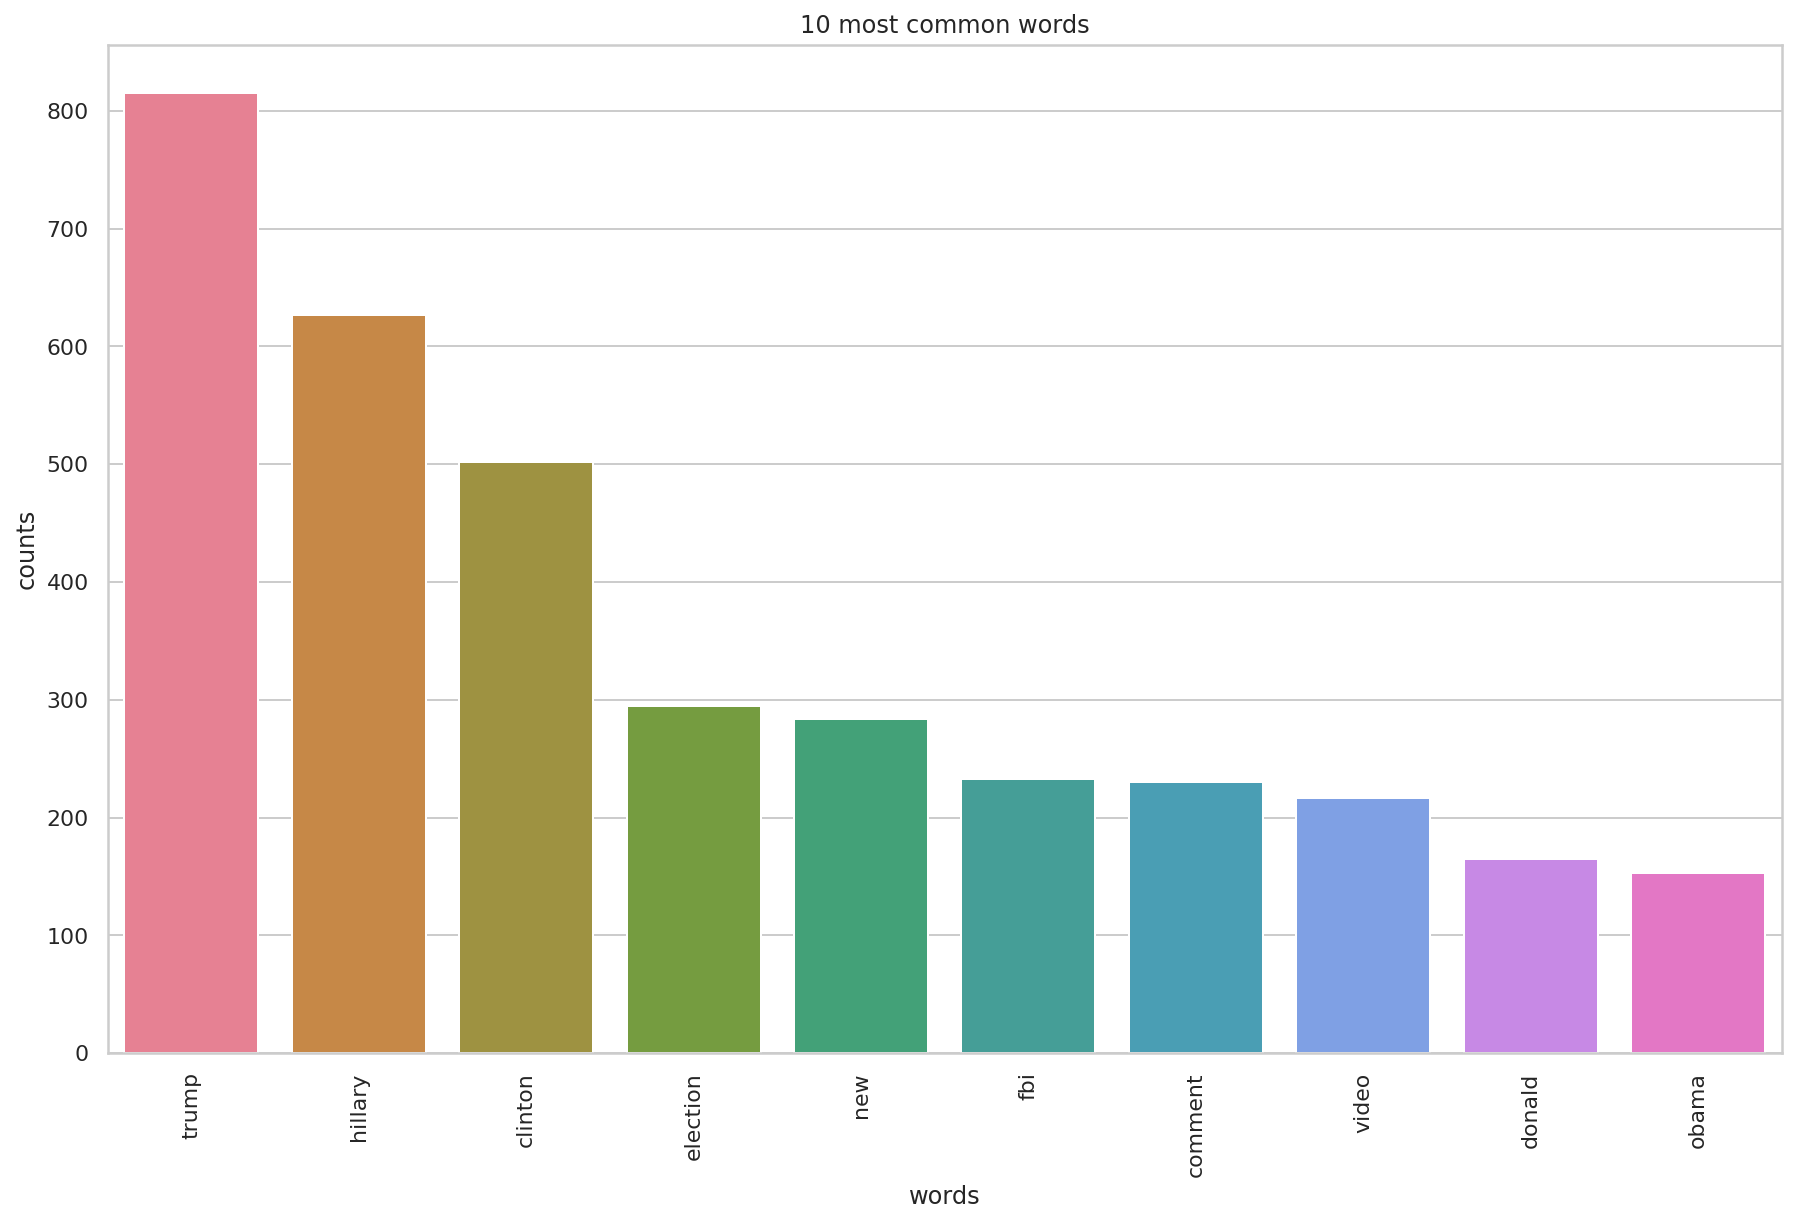

In [458]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_clickbait['clean_title'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [459]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state= 42)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
trump donald election vote video hillary day america comment november

Topic #1:
trump new americans eastern election video outlook putin makes white

Topic #2:
water obamacare gold soros million video comment link george johnson

Topic #3:
trump hillary trumps clinton election video comment star fraud media

Topic #4:
fbi hillary new director comment wall america watch comey voting

Topic #5:
news trump clintons hillary media black obama fake fbi loses

Topic #6:
election rock standing clinton trump fbi police new hillary comment

Topic #7:
clinton hillary wikileaks email emails fbi new campaign investigation election

Topic #8:
trump clinton hillary war know emails russia dakota pipeline obama

Topic #9:
isis mosul trump comment people war iraqi economy report world


In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

###Calculating topic score, topic number, topic frequent words using LDA

In [0]:
new_columns = ['topic_number', 'topic_score', 'topic_frequent_words']
df_clickbait = update_lda_results_to_dataset(
    df_clickbait,new_columns,'clean_title',
  dictionary_headline,lda_model_headline,lda_topics_words)

In [463]:
df_clickbait.head(10)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,breaking weiner cooperating fbi hillary email ...,2,0.871420,clinton hillary trump wikileaks campaign vote ...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,pin drop speech father daughter kidnapped kill...,9,0.579076,trump clinton comment hillary video election e...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,fantastic trumps point plan reform healthcare ...,9,0.909982,trump clinton comment hillary video election e...
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,hillary goes absolutely berserk protester rall...,7,0.690686,trump hillary donald election video world vote...
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,breaking nypd ready arrests weiner casehillary...,4,0.952622,american comment clinton hillary trump electio...
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,wow whistleblower tells chilling story massive...,9,0.480627,trump clinton comment hillary video election e...
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,breaking clinton clearedwas coordinated minute...,2,0.918164,clinton hillary trump wikileaks campaign vote ...
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,evil hillary supporters yell fck trumpburn tru...,7,0.930761,trump hillary donald election video world vote...


###Visualizing top 10 topics

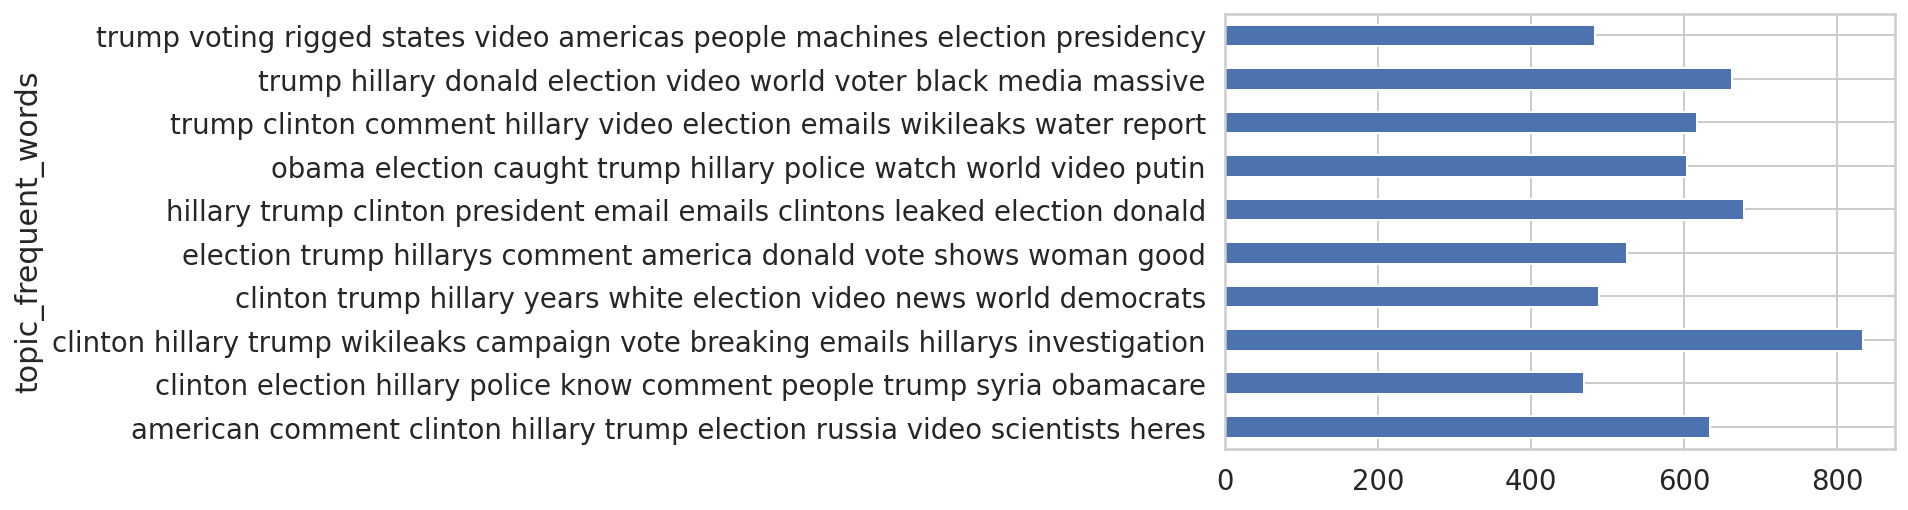

In [464]:
df_clickbait.groupby(['topic_frequent_words']).size().plot(kind='barh')

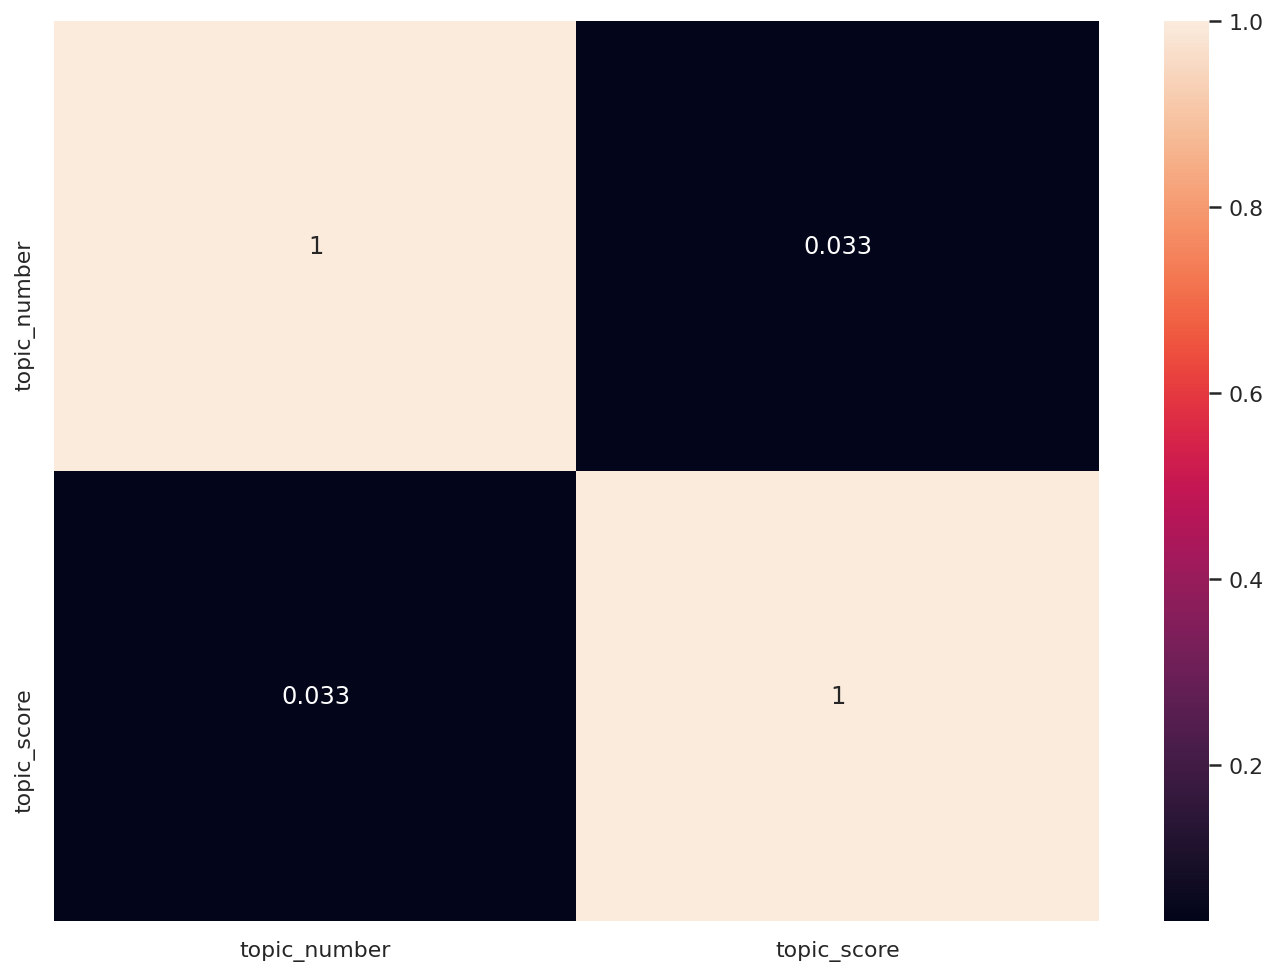

In [465]:
import seaborn as sns
corrMatrix = df_clickbait.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

In [466]:
df_clickbait['topic_number'].value_counts()

2    833
6    678
7    662
4    633
9    617
3    604
1    525
8    489
0    483
5    469
Name: topic_number, dtype: int64

###Sentiment Analysis

In [467]:
import nltk
nltk.download('vader_lexicon')
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(df_clickbait['clean_title'][0])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
muslims busted stole millions govt benefits 
{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.3818}


In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

In [470]:
sentiment = []
vader_pol = []
cmp_score = []
for row in df_clickbait['clean_title']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
df_clickbait['sentiment_vector'] = sentiment
df_clickbait['vader_polarity'] = vader_pol
df_clickbait['sentiment_score'] = cmp_score

Streaming output truncated to the last 5000 lines.
[0, 0.333, 0.667, 0.0, -0.3612]
[-1, 0.43, 0.265, 0.305, -0.4404]
[0, 0.481, 0.519, 0.0, -0.5719]
[-1, 0.754, 0.246, 0.0, -0.8481]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.213, 0.787, 0.0, -0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.641, 0.359, 0.4215]
[-1, 0.516, 0.484, 0.0, -0.4939]
[-1, 0.701, 0.299, 0.0, -0.6908]
[0, 0.0, 0.708, 0.292, 0.5106]
[-1, 0.51, 0.49, 0.0, -0.8074]
[0, 0.0, 0.635, 0.365, 0.3182]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.526, 0.474, 0.4019]
[0, 0.342, 0.417, 0.242, -0.296]
[0, 0.0, 0.745, 0.255, 0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.617, 0.383, 0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 0.581, 0.419, 0.5574]
[-1, 0.55, 0.45, 0.0, -0.7269]
[0, 0.286, 0.714, 0.0, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.406, 0.376, 0.218, -0.3612]
[0, 0.0, 0.649, 0.351, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.174, 0.359, 0.467, 0

In [471]:
df_clickbait.head(2)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,sentiment_vector,vader_polarity,sentiment_score
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...,"[0.0, 0.658, 0.342, 0.3818]",0,0.3818
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


###Taking high frequency words and computing the clickbait feature

In [472]:
tt = df_clickbait.clean_title.str.split(expand=True).stack().value_counts()
type(tt)

pandas.core.series.Series

In [0]:
tt_1 = df_clickbait.clean_title.str.split(expand=True).stack()

In [474]:
print(tt[:10])
count = 0
#total_rows = len(df_clickbait)
total_rows = len(tt_1)
sum = 0
dict_cb = {"True" : [], "False" : [], "Mostly" : [], "Half" : [], "Barely" : [], "Pants" : [] }
for k in tt.keys() :
  sum = sum + int(tt[count])
  pct = sum/total_rows
  #print(k,sum,pct)
  if pct < 0.1 :
    dict_cb["True"].append(k)
  elif pct < 0.15 :
    dict_cb["Mostly"].append(k)
  elif pct < 0.3 :
    dict_cb["Half"].append(k)
  elif pct < 0.6 :
    dict_cb["Pants"].append(k)
  elif pct < 0.8 :
    dict_cb["Barely"].append(k)    
  elif pct < 1.0 :
    dict_cb["False"].append(k)       
  count += 1
print("count : ",  count)
for k,v in dict_cb.items() :
  print(len(v))
  print(k,v)


trump       815
hillary     627
clinton     502
election    295
new         284
fbi         233
comment     230
video       217
donald      165
obama       153
dtype: int64
count :  10298
17
True ['trump', 'hillary', 'clinton', 'election', 'new', 'fbi', 'comment', 'video', 'donald', 'obama', 'war', 'emails', 'email', 'campaign', 'russia', 'people', 'hillarys']
6977
False ['trend', 'bid', 'blasted', 'authority', 'gops', 'iraqs', 'breasts', 'facto', 'mohr', 'balance', 'hezbollah', 'icelands', 'fires', 'discussing', 'ongoing', 'charge', 'buck', 'beats', 'hater', 'battleground', 'lobby', 'oath', 'readers', 'kinds', 'row', 'exploding', 'abortion', 'pc', 'penny', 'awakening', 'exactly', 'greater', 'harvey', 'index', 'tpp', 'communists', 'insults', 'controlling', 'kansas', 'jawdropping', 'theme', 'pedophilia', 'confirming', 'carcinogenic', 'understand', 'sarah', 'protected', 'envoy', 'batch', 'fine', 'pumpkin', 'pimp', 'wakes', 'remains', 'pulling', 'teaches', 'guards', 'freeloaders', 'cats',

In [0]:
def apply_cb_using_words(text) :
  #print(text)
  text = str(text).split(" ")
  #print(text)
  keys = ['True','Mostly','Half','Pants','Barely','False']
  for k in keys :
     if set(text).intersection(set(dict_cb[k])) :
       return k
  return 'False' 

In [476]:
apply_cb_using_words('showing')

'Barely'

In [477]:
df_clickbait['clean_title']

0              muslims busted stole millions govt benefits
1               attorney general loretta lynch plead fifth
2        breaking weiner cooperating fbi hillary email ...
3        pin drop speech father daughter kidnapped kill...
4        fantastic trumps point plan reform healthcare ...
                               ...                        
12907            stocks pumpndump crude crumbles week lows
12909                             rules rulers world works
12910              fact check trump right clinton cause ww
12911    caught tape isis destroys iraqi abrams antitan...
12912    obamacare architect admits law working designe...
Name: clean_title, Length: 5993, dtype: object

In [0]:
# clickbait_features = ['clickbait']
colname = 'clean_title'
def update_data_set_for_clickbait_features1(dataframe):
    dataframe['clickbait'] = dataframe.apply(lambda row: apply_cb_using_words(row[colname]), axis=1)
    return dataframe


In [0]:
df_clickbait = update_data_set_for_clickbait_features1(df_clickbait)

In [480]:
df_clickbait.head(5)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,sentiment_vector,vader_polarity,sentiment_score,clickbait
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...,"[0.0, 0.658, 0.342, 0.3818]",0,0.3818,Half
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,Pants
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,breaking weiner cooperating fbi hillary email ...,2,0.871420,clinton hillary trump wikileaks campaign vote ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,True
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,pin drop speech father daughter kidnapped kill...,9,0.579076,trump clinton comment hillary video election e...,"[0.398, 0.602, 0.0, -0.765]",0,-0.7650,True
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,fantastic trumps point plan reform healthcare ...,9,0.909982,trump clinton comment hillary video election e...,"[0.0, 0.69, 0.31, 0.5574]",0,0.5574,Mostly


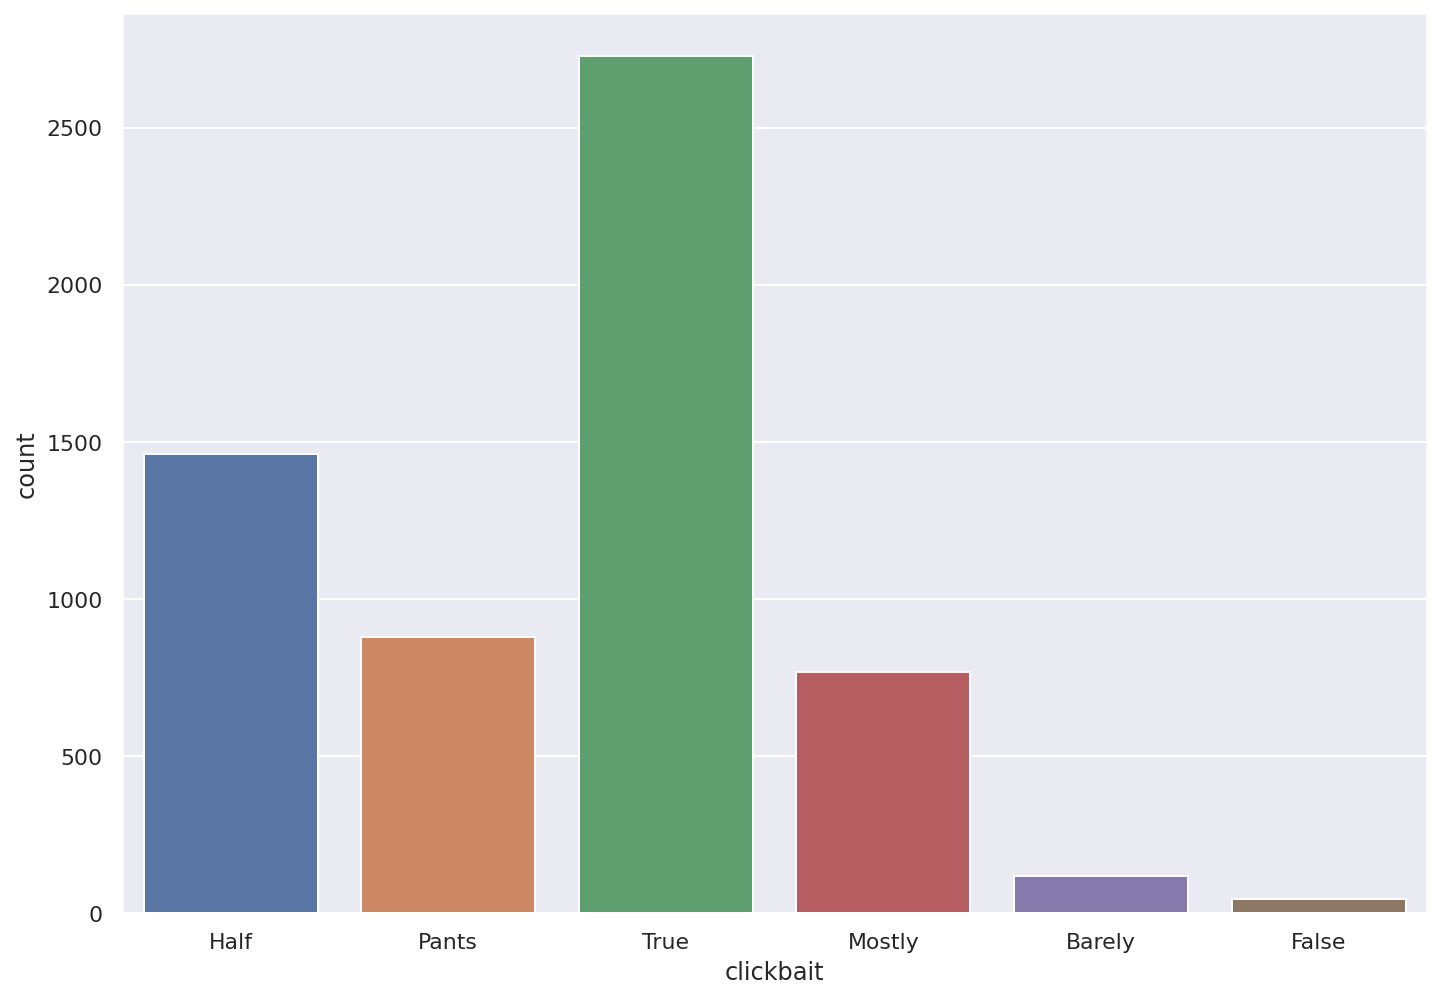

In [481]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="clickbait", data=df_clickbait)

In [0]:
def find_question(text):
    c = text.count('?')
    return c

In [0]:
def find_exclamation(text):
    c = text.count('!')
    return c

In [0]:
def find_modulo(text):
    c = text.count('%')
    return c

In [0]:
def find_hash(text):
    c = text.count('#')
    return c

In [0]:
import string
def find_caps_ratio(text):
    temp_np_title = text.strip(string.punctuation).split()
    np_title = [word.strip(string.punctuation) for word in temp_np_title]
    final_title = [word for word in np_title if word not in set(stopwords.words('english'))]
    final_title = " ".join(final_title)
    num_caps = len([elem for elem in final_title if elem.isupper()])
    num_words = len([elem for elem in final_title if elem == ' ']) + 1
    ratio = num_caps / num_words
    return ratio

In [0]:
colname = 'title'

In [0]:
clickbait_features = ['question','exclamation','modulo','hash','caps_ratio','length_of_text']
def update_data_set_for_clickbait_features(dataframe):
    dataframe[clickbait_features] = dataframe.apply(lambda row: pd.Series([find_question(str(row[colname])), find_exclamation(str(row[colname])), find_modulo(str(row[colname])), find_hash(str(row[colname])), find_caps_ratio(str(row[colname])),str(len(str(row[colname])))]),axis=1)
    return dataframe

In [0]:
df_clickbait = update_data_set_for_clickbait_features(df_clickbait)

In [490]:
for x in ['question','exclamation','modulo','hash']:
   print(df_clickbait[x].unique())
   print(df_clickbait[x].value_counts())

[0 1 2 5 3]
0    5513
1     457
2      21
3       1
5       1
Name: question, dtype: int64
[0 1 2 3 4]
0    5668
1     282
2      31
3       8
4       4
Name: exclamation, dtype: int64
[0 1 2]
0    5936
1      49
2       8
Name: modulo, dtype: int64
[0 1 2 3]
0    5958
1      33
3       1
2       1
Name: hash, dtype: int64


In [0]:
def clickbait_label(x):
  if (x == 'True'):
    return 1.0
  elif (x == 'Mostly'):
    return 0.8
  elif (x == 'Half'):
    return 0.6
  elif (x == 'Pants'):
    return 0.4
  elif (x == 'Barely'):
    return 0.2
  elif (x == 'False'):
    return 0.1

In [0]:
df_clickbait['clickbait_label']=df_clickbait['clickbait'].apply(clickbait_label)

In [493]:
df_clickbait.head()

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,sentiment_vector,vader_polarity,sentiment_score,clickbait,question,exclamation,modulo,hash,caps_ratio,length_of_text,clickbait_label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...,"[0.0, 0.658, 0.342, 0.3818]",0,0.3818,Half,0,0,0,0,1.625000,53,0.6
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,Pants,1,0,0,0,1.000000,59,0.4
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,breaking weiner cooperating fbi hillary email ...,2,0.871420,clinton hillary trump wikileaks campaign vote ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,True,0,0,0,0,2.000000,68,1.0
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,pin drop speech father daughter kidnapped kill...,9,0.579076,trump clinton comment hillary video election e...,"[0.398, 0.602, 0.0, -0.765]",0,-0.7650,True,0,1,0,0,2.315789,125,1.0
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,fantastic trumps point plan reform healthcare ...,9,0.909982,trump clinton comment hillary video election e...,"[0.0, 0.69, 0.31, 0.5574]",0,0.5574,Mostly,0,2,0,0,2.285714,99,0.8


In [494]:
df_clickbait.shape

(5993, 17)

###Cosine Similarity

In [0]:
def cosine_sim(statement):
    statement=statement.split('@@')
    # print(statement)
    text1,text2=statement[0],statement[1]
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = vectorizer.fit_transform([text1, text2])
    sim_score=((tfidf * tfidf.T).A)[0,1]
    # if sim_score*100>0:
    #   return 1
    return sim_score

In [0]:
df_clickbait['sample'] = df_clickbait['clean_title'] +'@@'+df_clickbait['topic_frequent_words']

In [0]:
df_clickbait['cosineSim']=df_clickbait['sample'].apply(lambda x: cosine_sim(x))

In [498]:
df_clickbait.head(2)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,sentiment_vector,vader_polarity,sentiment_score,clickbait,question,exclamation,modulo,hash,caps_ratio,length_of_text,clickbait_label,sample,cosineSim
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...,"[0.0, 0.658, 0.342, 0.3818]",0,0.3818,Half,0,0,0,0,1.625,53,0.6,muslims busted stole millions govt benefits@@e...,0.0
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,Pants,1,0,0,0,1.000,59,0.4,attorney general loretta lynch plead fifth@@tr...,0.0


###Named Entity Recognition [NER]

In [0]:
import spacy
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
def generate_ner(text):
    doc = nlp(text)
    return [str(chunk) for chunk in doc.noun_chunks] + [str(token) for token in doc if token.pos_ == "VERB"]

def generate_ner_verb(text):
    doc = nlp(text)
    return [str(token) for token in doc if token.pos_ == "VERB"]

def spacy_similarity(t1,t2):
    doc1 = nlp(t1)
    doc2 = nlp(t2)
    return doc1.similarity(doc2)

In [0]:
df_clickbait['ner_title'] = df_clickbait['clean_title'].apply(lambda x: ' '.join(generate_ner(x)))

In [0]:
df_clickbait['ner_sample'] = df_clickbait['sample'].apply(lambda x: ' '.join(generate_ner(x)))

In [0]:
df_clickbait['nerScore'] = df_clickbait.apply(lambda x: (spacy_similarity(x.ner_sample,x.ner_title)),axis=1)

In [634]:
df_clickbait.head(2)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,sentiment_vector,vader_polarity,sentiment_score,clickbait_feature,question,exclamation,modulo,hash,caps_ratio,length_of_text,clickbait,sample,cosineSim,textlabel,class,ner_title,ner_sample,nerScore
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...,"[0.0, 0.658, 0.342, 0.3818]",0,0.3818,Half,0,0,0,0,1.625,53,0.6,muslims busted stole millions govt benefits@@e...,0.0,FALSE,0,muslims millions govt benefits busted,muslims millions govt benefits@@election trump...,0.825452
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,Pants,1,0,0,0,1.000,59,0.4,attorney general loretta lynch plead fifth@@tr...,0.0,FALSE,0,attorney general loretta lynch,attorney general loretta lynch plead fifth@@tr...,0.864165


###Applying Neural Networks

In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
X_fake_CB = df_clickbait.clean_title.values
y = df_clickbait['clickbait_label']
X_tfidf = tfidf.fit_transform (X_fake_CB)

In [501]:
X_tfidf.shape

(5993, 45)

In [0]:
A = X_tfidf.toarray()
X_tfidf = np.pad(A, ((0,0),(0,99)), mode='constant')

In [503]:
X_tfidf.shape

(5993, 144)

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(144, input_dim=144, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [505]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=1000, verbose=1)
kfold = KFold(n_splits=2)
results = cross_val_score(estimator, X_tfidf, y, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
2996/2996 [==============================] - 0s 28us/step - loss: 0.6137
Epoch 2/100
2996/2996 [==============================] - 0s 5us/step - loss: 0.5765
Epoch 3/100
2996/2996 [==============================] - 0s 5us/step - loss: 0.5396
Epoch 4/100
2996/2996 [==============================] - 0s 5us/step - loss: 0.5022
Epoch 5/100
2996/2996 [==============================] - 0s 5us/step - loss: 0.4638
Epoch 6/100
2996/2996 [==============================] - 0s 8us/step - loss: 0.4241
Epoch 7/100
2996/2996 [==============================] - 0s 5us/step - loss: 0.3828
Epoch 8/100
2996/2996 [==============================] - 0s 6us/step - loss: 0.3405
Epoch 9/100
2996/2996 [==============================] - 0s 5us/step - loss: 0.2973
Epoch 10/100
2996/2996 [==============================] - 0s 6us/step - loss: 0.2538
Epoch 11/100
2996/2996 [==============================] - 0s 5us/step - loss: 0.2108
Epoch 12/100
2996/2996 [==============================] - 0s 5us/step - l

##Predicting for Liar Liar dataset

In [0]:
X_liar_CB = df_liar.clean_statement.values
X_liar_tfidf = tfidf.fit_transform (X_liar_CB)

In [507]:
X_liar_tfidf.shape

(12791, 144)

In [508]:
estimator.fit(X_tfidf, y)

Epoch 1/100
5993/5993 [==============================] - 0s 16us/step - loss: 0.6041
Epoch 2/100
5993/5993 [==============================] - 0s 6us/step - loss: 0.5223
Epoch 3/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.4349
Epoch 4/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.3417
Epoch 5/100
5993/5993 [==============================] - 0s 6us/step - loss: 0.2445
Epoch 6/100
5993/5993 [==============================] - 0s 4us/step - loss: 0.1534
Epoch 7/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.0802
Epoch 8/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.0358
Epoch 9/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.0198
Epoch 10/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.0199
Epoch 11/100
5993/5993 [==============================] - 0s 5us/step - loss: 0.0203
Epoch 12/100
5993/5993 [==============================] - 0s 5us/step - l

In [509]:
y_liar_pred = estimator.predict(X_liar_tfidf)

12791/12791 [==============================] - 0s 3us/step


##Saving Neural Network model

In [0]:
import pickle
#write to file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait_neural_network.pkl', 'wb') as f:
    pickle.dump(estimator, f)

#read from file
# with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait_neural_network.pkl', 'rb') as f:
#     CB_NN = pickle.load(f)

##Predicting for News category dataset

In [0]:
X_news_text = df_newscat.clean_text.values
X_news_tfidf = tfidf.fit_transform (X_news_text)

In [512]:
X_news_tfidf.shape

(26913, 84)

In [0]:
A = X_news_tfidf.toarray()
X_news_tfidf = np.pad(A, ((0,0),(0,60)), mode='constant')

In [514]:
X_news_tfidf.shape

(26913, 144)

In [515]:
y_news_pred = estimator.predict(X_news_tfidf)

26913/26913 [==============================] - 0s 2us/step


In [0]:
df_newscat['clickbait'] = y_news_pred 
df_liar['clickbait'] = y_liar_pred

In [517]:
df_newscat.head(2)

,category,headline,authors,link,short_description,date,clean_text,textlabel,clickbait
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true,1.004520
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true,0.503613


In [518]:
df_liar.head(2)

,clean_statement,speaker,subject,class,clickbait
5382,loopholes businesses pay effectively lowest ta...,barack-obama,taxes,half-true,0.544682
9425,dont describe plan amnesty ad dont amnesty,mitt-romney,immigration,pants-fire,0.768821


In [519]:
df1_fake['textlabel'].value_counts()

FALSE    5993
Name: textlabel, dtype: int64

In [0]:
df_liar = df_liar.rename(columns = {'class':'textlabel'})

In [521]:
df_liar.head(2)

,clean_statement,speaker,subject,textlabel,clickbait
5382,loopholes businesses pay effectively lowest ta...,barack-obama,taxes,half-true,0.544682
9425,dont describe plan amnesty ad dont amnesty,mitt-romney,immigration,pants-fire,0.768821


In [0]:
df_clickbait = df_clickbait.rename(columns = {'clickbait_label':'class'})

In [523]:
df_clickbait.head(2)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,sentiment_vector,vader_polarity,sentiment_score,clickbait,question,exclamation,modulo,hash,caps_ratio,length_of_text,class,sample,cosineSim
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...,"[0.0, 0.658, 0.342, 0.3818]",0,0.3818,Half,0,0,0,0,1.625,53,0.6,muslims busted stole millions govt benefits@@e...,0.0
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,Pants,1,0,0,0,1.000,59,0.4,attorney general loretta lynch plead fifth@@tr...,0.0


##Label_encoding News category dataset


In [524]:
from sklearn import preprocessing
label_encoder_newscat = preprocessing.LabelEncoder()
label_encoder_newscat.fit(df_newscat['textlabel'])
label_NC = label_encoder_newscat.transform(df_newscat['textlabel'])
label_encoder_newscat.transform(df_newscat['textlabel'])

np.unique(label_NC, return_index=True)

(array([0, 1, 2]), array([7332,    0,   11]))

In [525]:
y=label_NC
df_newscat['class'] = y
label_encoder_newscat.inverse_transform(y)

array(['half-true', 'half-true', 'half-true', ..., 'half-true',
       'half-true', 'half-true'], dtype=object)

In [526]:
np.unique(y)

array([0, 1, 2])

##Label encoding Liar Liar dataset

In [527]:
label_encoder_liar = preprocessing.LabelEncoder()
label_encoder_liar.fit(df_liar['textlabel'])
label_liar = label_encoder_liar.transform(df_liar['textlabel'])
label_encoder_liar.transform(df_liar['textlabel'])

np.unique(label_liar, return_index=True)

(array([0, 1, 2, 3, 4, 5]), array([ 6, 11,  2,  0, 12,  1]))

In [528]:
y_liar=label_liar
df_liar['class'] = y_liar
label_encoder_liar.inverse_transform(y_liar)

array(['half-true', 'pants-fire', 'barely-true', ..., 'half-true', 'TRUE',
       'barely-true'], dtype=object)

In [529]:
np.unique(y)

array([0, 1, 2])

In [530]:
df_liar.head(2)

,clean_statement,speaker,subject,textlabel,clickbait,class
5382,loopholes businesses pay effectively lowest ta...,barack-obama,taxes,half-true,0.544682,3
9425,dont describe plan amnesty ad dont amnesty,mitt-romney,immigration,pants-fire,0.768821,5


In [531]:
df1_fake.head(2)

,author,title,text,site_url,domain_rank,clean_title,textlabel
0,Barracuda Brigade,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,25689.0,muslims busted stole millions govt benefits,FALSE
1,reasoning with facts,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,25689.0,attorney general loretta lynch plead fifth,FALSE


In [0]:
df_clickbait['textlabel'] = df1_fake['textlabel']

In [0]:
df_clickbait = df_clickbait.rename(columns = {'clickbait':'clickbait_feature','class':'clickbait'})

##Label encoding clickbait dataset


In [534]:
label_encoder_cb = preprocessing.LabelEncoder()
label_encoder_cb.fit(df_clickbait['textlabel'])
label_cb = label_encoder_cb.transform(df_clickbait['textlabel'])
label_encoder_cb.transform(df_clickbait['textlabel'])

np.unique(label_cb, return_index=True)

(array([0]), array([0]))

In [535]:
y_cb=label_cb
df_clickbait['class'] = y_cb
label_encoder_cb.inverse_transform(y_cb)

array(['FALSE', 'FALSE', 'FALSE', ..., 'FALSE', 'FALSE', 'FALSE'],
      dtype=object)

In [536]:
df_clickbait.head(2)

,title,text,clean_title,topic_number,topic_score,topic_frequent_words,sentiment_vector,vader_polarity,sentiment_score,clickbait_feature,question,exclamation,modulo,hash,caps_ratio,length_of_text,clickbait,sample,cosineSim,textlabel,class
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,muslims busted stole millions govt benefits,1,0.871407,election trump hillarys comment america donald...,"[0.0, 0.658, 0.342, 0.3818]",0,0.3818,Half,0,0,0,0,1.625,53,0.6,muslims busted stole millions govt benefits@@e...,0.0,FALSE,0
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth,9,0.871419,trump clinton comment hillary video election e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,Pants,1,0,0,0,1.000,59,0.4,attorney general loretta lynch plead fifth@@tr...,0.0,FALSE,0


In [537]:
df_newscat.head(2)

,category,headline,authors,link,short_description,date,clean_text,textlabel,clickbait,class
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,5/26/18,month health human services official revealed ...,half-true,1.004520,1
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,5/26/18,wiretaps feature conversations alexander torsh...,half-true,0.503613,1


##Merging all the three dataset by row wise


In [0]:
d1 = df_clickbait[['class','clickbait']].values
d2 = df_newscat[['class', 'clickbait']].values
d3 = df_liar[['class', 'clickbait']].values

In [0]:
dat = np.vstack((d1,d2))

In [0]:
arr = np.vstack((dat, d3))

In [541]:
arr.shape

(45697, 2)

In [0]:
df_CB = pd.DataFrame(arr, columns=['label','clickbait'])

In [543]:
df_CB.head(2)

,label,clickbait
0,0.0,0.6
1,0.0,0.4


In [544]:
df_CB['label'].value_counts()

1.0    28728
0.0     8502
3.0     2627
4.0     2454
2.0     2339
5.0     1047
Name: label, dtype: int64

##RandomForest Classifier for amalgamated dataset..



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, auc

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_CB['clickbait'], df_CB['label'], test_size=0.20, random_state=42)

In [547]:
xtrain = np.asmatrix(X_train)
xtest = np.asmatrix(X_test)
xtrain.shape
xtest.shape

(1, 9140)

In [0]:
xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

In [549]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(xtrain, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
ypred = clf.predict(xtest)

In [551]:
rfscore = accuracy_score(y_test, ypred)
rff1 = f1_score(y_test, ypred, average='weighted')
rff1

0.7076978964589898

###Confusion Matrix

In [552]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ypred)
print(confusion_matrix)

[[1295  268   38   54   70   24]
 [ 132 5071  151  168  162   52]
 [  62  213   66   52   52   22]
 [  73  249   51   59   54   22]
 [  65  231   40   55   73   21]
 [  22   97   16   21   25   14]]


###Compute precision, recall, F-measure and support

In [553]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1749
         1.0       0.83      0.88      0.85      5736
         2.0       0.18      0.14      0.16       467
         3.0       0.14      0.12      0.13       508
         4.0       0.17      0.15      0.16       485
         5.0       0.09      0.07      0.08       195

    accuracy                           0.72      9140
   macro avg       0.37      0.35      0.36      9140
weighted avg       0.70      0.72      0.71      9140



Text(0.5, 527.9871999999999, 'Predicted label')

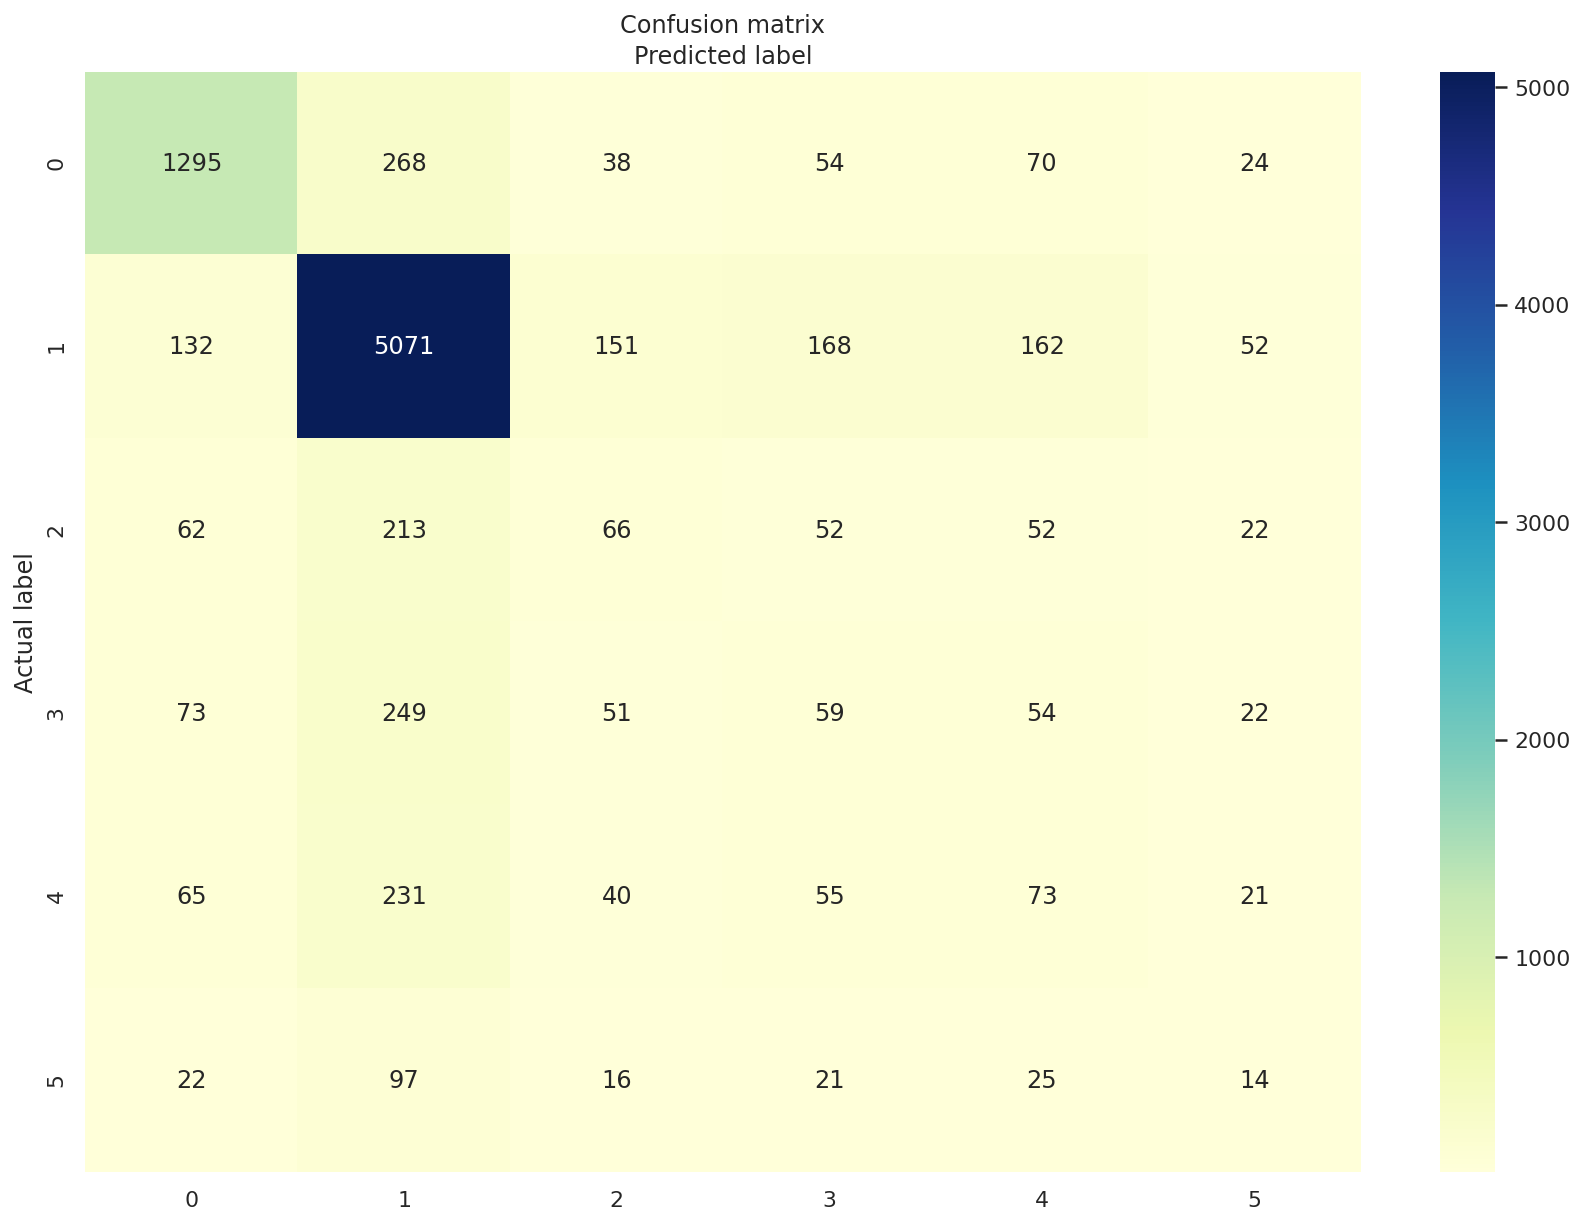

In [554]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##XGBoost

In [0]:
from xgboost import XGBClassifier

In [556]:
model = XGBClassifier()
model.fit(xtrain, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [557]:
ypred = model.predict(xtest)
xgscore = accuracy_score(y_test, ypred)
xgf1 = f1_score(y_test, ypred, average='weighted')
xgf1

0.6899925005821455

In [558]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ypred)
print(confusion_matrix)

[[1225  524    0    0    0    0]
 [   0 5735    1    0    0    0]
 [   0  447   20    0    0    0]
 [   1  505    2    0    0    0]
 [   0  485    0    0    0    0]
 [   0  195    0    0    0    0]]


In [559]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82      1749
         1.0       0.73      1.00      0.84      5736
         2.0       0.87      0.04      0.08       467
         3.0       0.00      0.00      0.00       508
         4.0       0.00      0.00      0.00       485
         5.0       0.00      0.00      0.00       195

    accuracy                           0.76      9140
   macro avg       0.43      0.29      0.29      9140
weighted avg       0.69      0.76      0.69      9140



Text(0.5, 527.9871999999999, 'Predicted label')

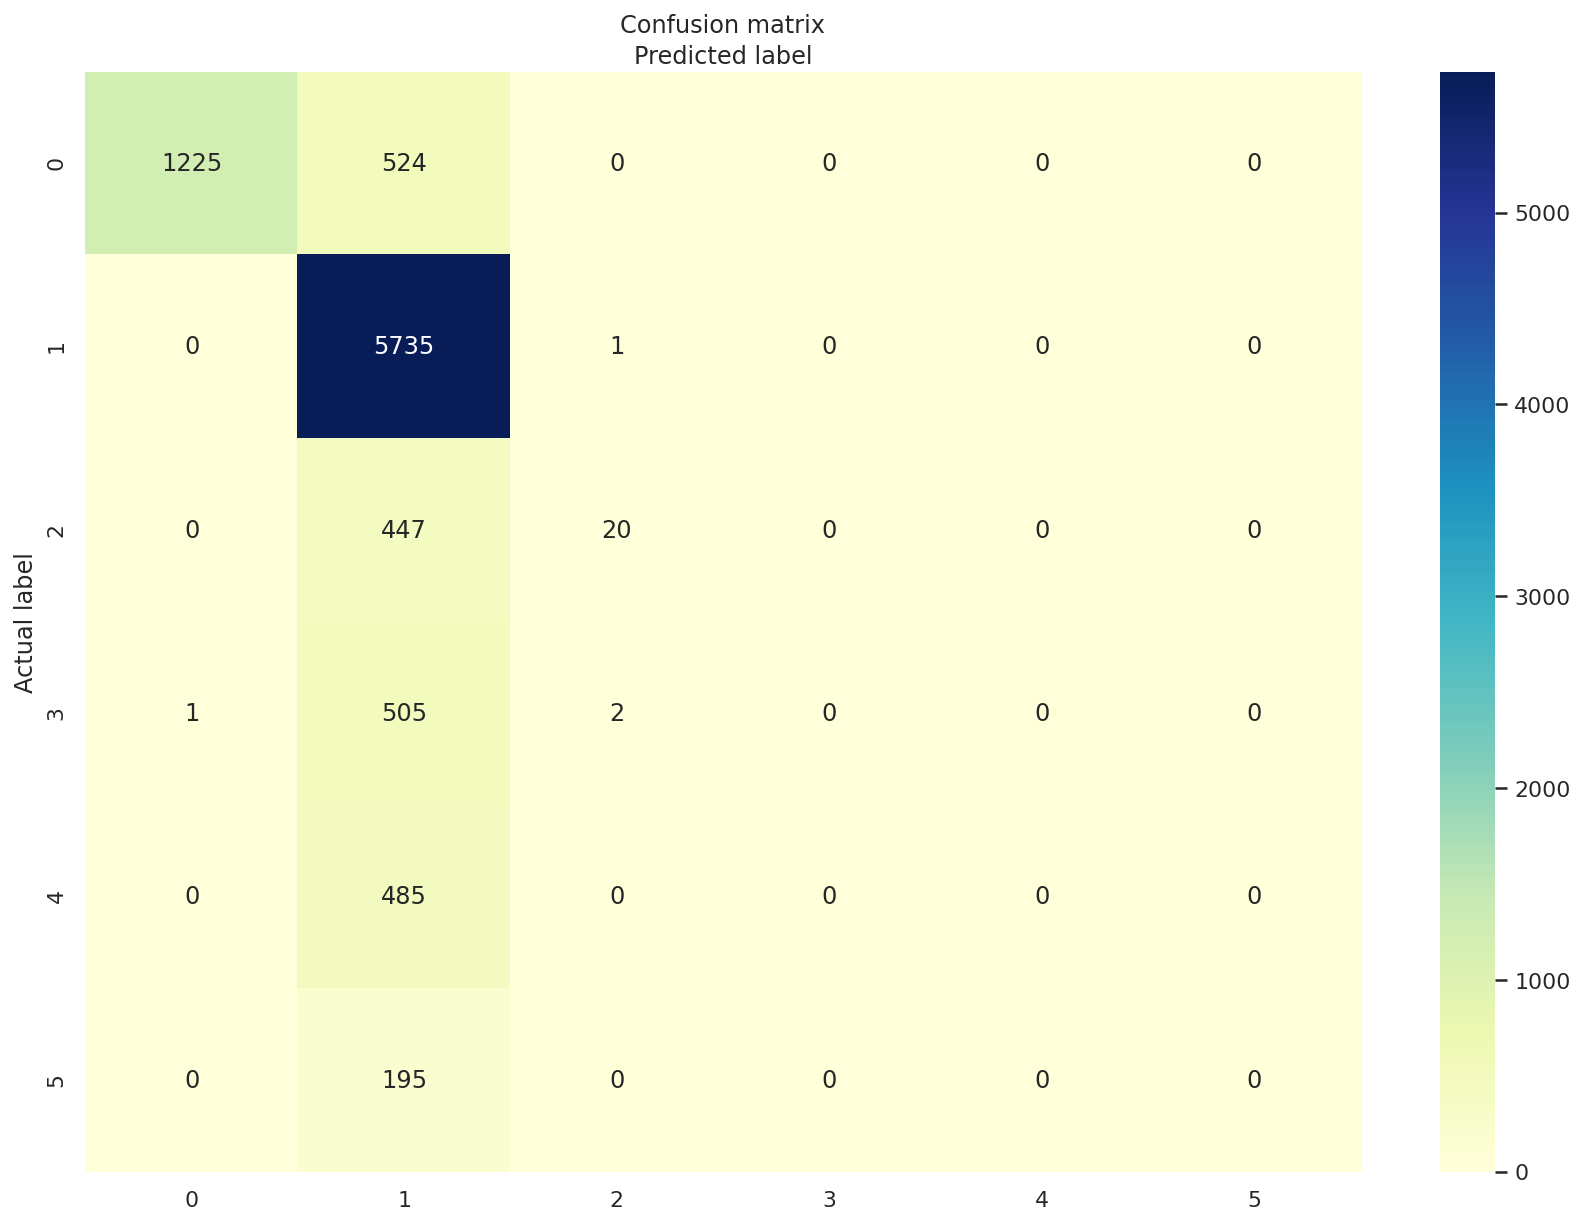

In [560]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [562]:
decTclf = DecisionTreeClassifier(random_state=0)
decTclf.fit(xtrain, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [563]:
ypred = decTclf.predict(xtest)
decscore = accuracy_score(y_test, ypred)
decf1 = f1_score(y_test, ypred, average='weighted')
decf1

0.7055205107693499

In [564]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ypred)
print(confusion_matrix)

[[1316  265   37   51   59   21]
 [ 146 5072  150  164  156   48]
 [  72  215   64   50   47   19]
 [  86  252   49   53   49   19]
 [  72  232   41   54   66   20]
 [  26   98   14   21   24   12]]


In [565]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      1749
         1.0       0.83      0.88      0.85      5736
         2.0       0.18      0.14      0.16       467
         3.0       0.13      0.10      0.12       508
         4.0       0.16      0.14      0.15       485
         5.0       0.09      0.06      0.07       195

    accuracy                           0.72      9140
   macro avg       0.36      0.35      0.35      9140
weighted avg       0.69      0.72      0.71      9140



Text(0.5, 527.9871999999999, 'Predicted label')

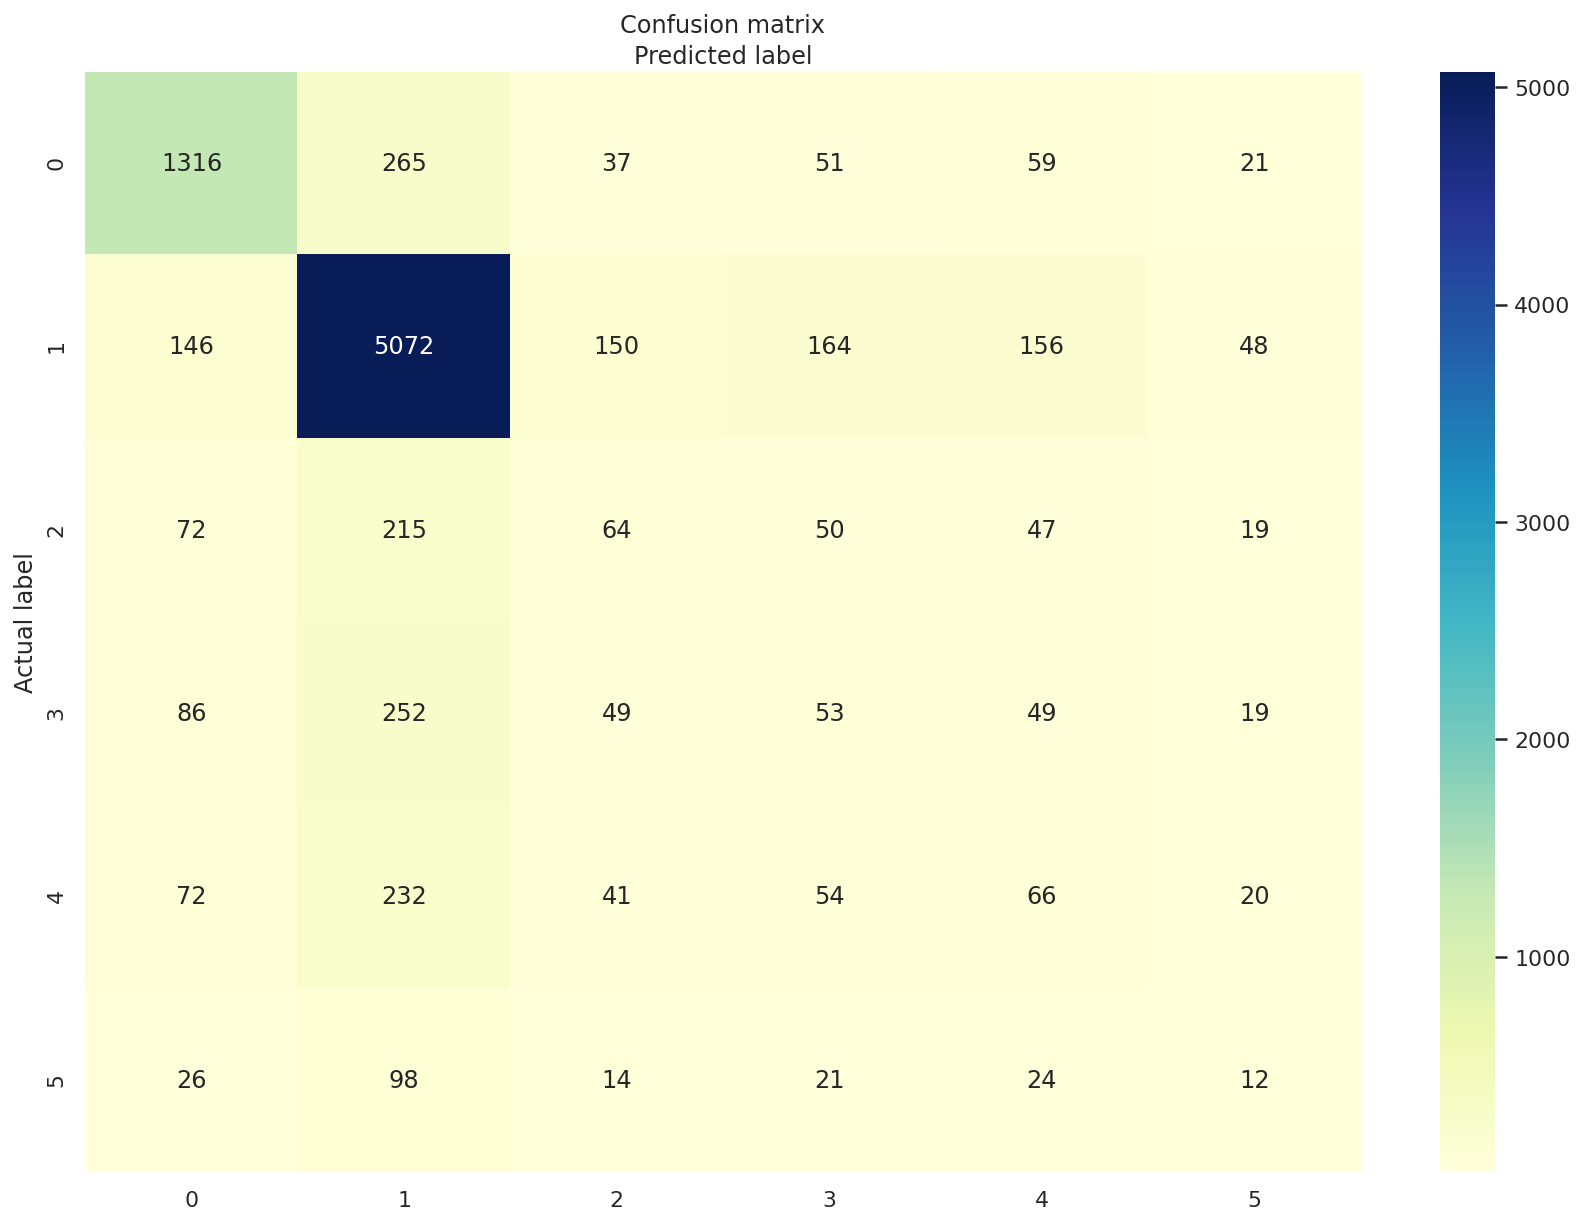

In [566]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Saving Classification model..

In [0]:
import pickle
#write to file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait.pkl', 'wb') as f:
    pickle.dump(clf, f)

#read from file
with open('/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/clickbait.pkl', 'rb') as f:
    rf = pickle.load(f)

In [568]:
print(xtest.shape)
y_pred = rf.predict(xtest)
accuracy_score(y_test, y_pred)

(9140, 1)


0.7196936542669584

In [569]:
df_liar.head()

,clean_statement,speaker,subject,textlabel,clickbait,class
5382,loopholes businesses pay effectively lowest ta...,barack-obama,taxes,half-true,0.544682,3
9425,dont describe plan amnesty ad dont amnesty,mitt-romney,immigration,pants-fire,0.768821,5
2198,program immigrants come bring million dollars ...,jeff-greene,immigration,barely-true,0.700391,2
7751,texas doctors currently accepting new medicaid...,rick-perry,"federal-budget,health-care,medicaid,public-hea...",barely-true,0.452320,2
4959,nafta supported secretary clinton cost jobs na...,bernie-s,"jobs,trade",barely-true,0.783086,2


In [0]:
df_liar_index = df_liar.sort_index(axis = 0)

In [0]:
df_liar_test = df_liar_index.iloc[0:3000, :]

In [572]:
df_liar_test.shape

(3000, 6)

In [573]:
df_liar_test.head()

,clean_statement,speaker,subject,textlabel,clickbait,class
0,says annies list political group supports thir...,dwayne-bohac,abortion,FALSE,0.558649,0
1,decline coal start started natural gas took st...,scott-surovell,"energy,history,job-accomplishments",half-true,0.689723,3
2,hillary clinton agrees john mccain voting geor...,barack-obama,foreign-policy,mostly-true,0.772853,4
3,health care reform legislation likely mandate ...,blog-posting,health-care,FALSE,0.609795,0
4,economic turnaround started end term,charlie-crist,"economy,jobs",half-true,0.503613,3


In [574]:
df_liar_test.tail()

,clean_statement,speaker,subject,textlabel,clickbait,class
2995,percentage texas high school students meeting ...,don-willett,"children,education",TRUE,0.642669,1
2996,obamas liberal fiscal agenda billion new spending,republican-national-committee-republican,federal-budget,half-true,0.559308,3
2997,tommy thompson millions corporations outsource...,majority-pac,"corporations,jobs,message-machine-2012,workers",half-true,0.847405,3
2998,georgia welldeserved reputation setting gold s...,kevin-levitas,food-safety,FALSE,0.817352,0
2999,asked unions pay health care insurance said un...,scott-walker,"health-care,labor,state-budget,state-finances",barely-true,0.554040,2


In [0]:
df_liar_CB = df_liar_test[['clickbait']]

In [576]:
type(df_liar_CB)

pandas.core.frame.DataFrame

In [577]:
df_liar_CB.head()

,clickbait
0,0.558649
1,0.689723
2,0.772853
3,0.609795
4,0.503613


In [578]:
df_liar_CB.shape

(3000, 1)

In [579]:
print(df_liar_CB.shape)
y_pred = rf.predict(df_liar_CB)
# accuracy_score(y_test, y_pred)
y_pred

(3000, 1)


array([0., 3., 4., ..., 1., 1., 2.])

In [0]:
y_pred = y_pred.astype(int)

In [581]:
y_pred_list = y_pred.tolist()
labels = list(label_encoder_liar.inverse_transform(y_pred_list))
# arr = np.asarray(y_pred_list)
labels

['FALSE',
 'half-true',
 'mostly-true',
 'half-true',
 'TRUE',
 'TRUE',
 'TRUE',
 'mostly-true',
 'half-true',
 'mostly-true',
 'mostly-true',
 'half-true',
 'FALSE',
 'mostly-true',
 'barely-true',
 'TRUE',
 'TRUE',
 'barely-true',
 'FALSE',
 'mostly-true',
 'FALSE',
 'mostly-true',
 'mostly-true',
 'half-true',
 'barely-true',
 'TRUE',
 'TRUE',
 'half-true',
 'TRUE',
 'FALSE',
 'barely-true',
 'half-true',
 'TRUE',
 'mostly-true',
 'mostly-true',
 'FALSE',
 'TRUE',
 'mostly-true',
 'TRUE',
 'TRUE',
 'FALSE',
 'FALSE',
 'mostly-true',
 'pants-fire',
 'FALSE',
 'FALSE',
 'pants-fire',
 'FALSE',
 'TRUE',
 'pants-fire',
 'barely-true',
 'barely-true',
 'FALSE',
 'TRUE',
 'FALSE',
 'half-true',
 'half-true',
 'barely-true',
 'TRUE',
 'TRUE',
 'FALSE',
 'mostly-true',
 'FALSE',
 'mostly-true',
 'TRUE',
 'TRUE',
 'TRUE',
 'FALSE',
 'barely-true',
 'TRUE',
 'TRUE',
 'barely-true',
 'mostly-true',
 'mostly-true',
 'mostly-true',
 'FALSE',
 'TRUE',
 'FALSE',
 'FALSE',
 'half-true',
 'TRUE',
 '

###Computing Polynomial Equation using features Political bias, NodeRank, clickbait and title vs body

In [582]:
noderankdf = pd.read_csv(base_dir+'/Alternus_vera/Classification_2.csv') 
noderankdf['clickbaitclass'] = labels
 noderankdf.head(3)

,Unnamed: 0,Unnamed: 0.1,NodeRankClass,politicalbiasClass,clickbaitclass
0,0,0,FALSE,FALSE,FALSE
1,1,1,half-true,mostly-true,half-true
2,2,2,mostly-true,mostly-true,mostly-true


In [583]:
noderankdf.tail()

,Unnamed: 0,Unnamed: 0.1,NodeRankClass,politicalbiasClass,clickbaitclass
2995,2995,2995,FALSE,FALSE,TRUE
2996,2996,2996,mostly-true,FALSE,half-true
2997,2997,2997,FALSE,mostly-true,TRUE
2998,2998,2998,mostly-true,mostly-true,TRUE
2999,2999,2999,FALSE,FALSE,barely-true


In [0]:
df = pd.read_csv(base_dir+'/Alternus_vera/Classification_4.csv')

In [585]:
df.head(2)

,Unnamed: 0,NodeRankClass,politicalbiasClass,clickbaitclass,ActualClass,titlebodyclass
0,0,FALSE,FALSE,FALSE,FALSE,half-true
1,1,half-true,mostly-true,half-true,half-true,half-true


In [586]:
df.shape

(3000, 6)

In [0]:
accuracy_features = [0.4, 0.8, 0.7, 0.2]


In [599]:
accuracy_features

[0.4, 0.8, 0.7, 0.2]

In [600]:
type(accuracy_features)

list

In [608]:
acc_total = 0
for x in accuracy_features :
  acc_total += x
print(acc_total  )

2.1


In [0]:
weight = [float(a)/acc_total for a in accuracy_features]

In [0]:
for i in range(len(weight)):
  weight[i] = round(weight[i], 2) 

In [611]:
weight

[0.19, 0.38, 0.33, 0.1]

In [612]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['NodeRankClass'])

LabelEncoder()

In [0]:
df['NodeRank_label'] = label_encoder.transform(df['NodeRankClass'])
df['politicalbias_label'] = label_encoder.transform(df['politicalbiasClass'])
df['clickbait_label'] = label_encoder.transform(df['clickbaitclass'])
df['titlebody_label'] = label_encoder.transform(df['titlebodyclass'])

In [0]:
try:
  df.drop(columns=['Unnamed: 0'], inplace=True)
except e as Exception:
  pass

In [0]:
df_1 = df[['NodeRank_label', 'politicalbias_label','clickbait_label','titlebody_label']]

In [0]:
def calcLabel(x):
  a1 = x.NodeRank_label * weight[0]
  a2 = x.politicalbias_label * weight[1]
  a3 = x.clickbait_label * weight[2]
  a4 = x.titlebody_label * weight[3]
  s = int(round(a1+a2+a3+a4))
  return s

In [617]:
df_1.head(4)

,NodeRank_label,politicalbias_label,clickbait_label,titlebody_label
0,0,0,0,3
1,3,4,3,3
2,4,4,4,3
3,4,3,0,3


In [0]:
df_1['final_label'] = df_1.apply(lambda x: calcLabel(x), axis=1)

In [0]:
df['label_class'] = label_encoder.inverse_transform(df_1['final_label'].values)

In [0]:
from sklearn.metrics import accuracy_score

In [621]:
print('Accuracy Score is {}'.format(accuracy_score(df['ActualClass'], df['label_class'])*100))

Accuracy Score is 25.7


In [0]:
df_2 = df[['NodeRankClass', 'politicalbiasClass','clickbaitclass','titlebodyclass']]

In [0]:
df_2['final_class'] = df_2.mode(axis=1)[0]

In [624]:
print('Accuracy Score is {}'. format(round(accuracy_score(df['ActualClass'], df_2['final_class']), 2) * 100))

Accuracy Score is 36.0


###Transformers :Bert for Multi class classification

In [337]:

!pip install bert-for-tf2

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

     |████████████████████████████████| 40kB 1.8MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-cp36-none-any.whl size=30114 sha256=30b80cba0ec1a3ebb59263bf261659f8ef81c099bd96fd463a3864e0316fb09e
  Stored in directory: /root/.cache/pip/wheels/cf/3f/4d/79d7735015a5f523648df90d871ce8e89a7df8185f7703eeab
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=b647941b2ef685d4d322f05bfbcedde17b6f294fb0f2fa8bce5feb2da24a565e
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19473 sha256=b09b99e8308fe267c4ac1218d73b95e355e393b57a944f8f462e77e06b78734f
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [0]:
#Loding pretrained bert layer
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",trainable=False)

In [0]:
# Loading tokenizer from the bert layer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocab_file, do_lower_case)

In [0]:
import numpy as np
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [0]:

MAX_LEN = 64
train_input = bert_encode(df_clickbait.clean_title.values, tokenizer, max_len=MAX_LEN)
# encode  test set 
# test_input = bert_encode(test_df.text.values, tokenizer, max_len= MAX_LEN )
train_labels = df_clickbait.clickbait_feature.values

Bert Model takes longer time to train...

In [0]:
from tensorflow.keras.layers import  Input
input_word_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_mask")
segment_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="segment_ids")

#  output  
from tensorflow.keras.layers import Dense
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])  
clf_output = sequence_output[:, 0, :]
out = Dense(1, activation='sigmoid')(clf_output)   

# intilize model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# train
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=2,
    batch_size=32
)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 64)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 64)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

##Conclusion:
I have collected fake news datasets, news category and liar liar dataset from Kaggle. I brainstormed on the general pre-processing techniques that I did want to use. I also had common visualization methods and similar techniques for evaluating the classification model accuracy. I then enriched the dataset with clickbait feature and persisted it in a csv file. The basic idea is to train machine learning algorithms with training dataset and then generate a new dataset with these models. Then this new dataset is used as input for the combined machine learning algorithm. The combined model is then used to predict the fakeness in the corpus.

With the clickbait feature that I computed, I passed the title and clickbait label column to the Keras regressor model and able to predict the clickbait label for other two datasets [news category and liar-liar dataset]. Later I merged all the three dataset and applied to the three-classification model – Random Forest Classifier, XGBoost, and Decision Tree Classifier. When compared the accuracy of all three classification models, Random forest gave the highest accuracy of 72%.